# **Проект № 2 "Анализ тональности отзывов с сайта Кинопоиск с применением методов машинного обучения"**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!python -m spacy download ru_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from collections import Counter # необходимые импорты

from pymystem3 import Mystem
mystem = Mystem()

import re

import nltk

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
import spacy
nlp_rus = spacy.load("ru_core_news_lg")

In [ ]:
add_stop_ne = []

with open('/content/drive/MyDrive/stop_ru (project).txt', 'r', encoding='utf-8') as f: #использую этот список для удаления стоп-слов
     add_stop_ne = [i.strip() for i in f]

print(len(add_stop_ne)) # 552
#print(add_stop_ne)

552


In [ ]:
with open('/content/drive/MyDrive/MachineLearning /Project_2/Project_2_ner_list1.txt', 'r', encoding='utf-8') as f_ner:
  ner_list = [n.strip() for n in f_ner]
print(len(ner_list)) # 5283

5283


In [ ]:
ner_list

['джейми дорнан греть',
 'корвус корвус',
 'фальша фальша',
 'гуантанамо',
 'микки рурк шерилин фенн',
 'виктор вержбицкий',
 'эдди мерфи луи де фюнес',
 'милисент',
 'константин хабенский',
 'сюси муся',
 'ньют тессей скамандр',
 'джэк чан',
 'катана слипкнот',
 'фон чернуха',
 'ноа рингер дева патель',
 'кристиан mrs grey',
 'джиллиан кейт маккиннон',
 'картер',
 'дж р р толкиен',
 'сказка баум',
 'джони деппа',
 'иии',
 'аманда уоллер виола дэвис',
 'дэдшот уилл смит',
 'хлоя грей морец',
 'смурной',
 'эпл',
 'лейла',
 'ака',
 'тэйлор джонсосна',
 'э л джеймс ом',
 'эль диябло',
 'харли дедшот',
 'колчак анна',
 'азула',
 'феррер',
 'сергей евгений',
 'бэн',
 'мувь мувь',
 'айро айро',
 'мила кунис',
 'пф',
 'лестрейндж зоя кравица',
 'браво джейми дорнан',
 'аанг аанг',
 'долгорукий',
 'дева патель',
 'питер кристен уиг',
 'виола дэвис этакий',
 'джаред лето кара делевинуть',
 'фильмографический',
 'чечня',
 'грета гервин',
 'гудини',
 'джиллиан гольцман',
 'сергей безрукова',
 'фл

In [ ]:
file = '/content/drive/MyDrive/MachineLearning /Project_2/Df_all_reviews.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Sheet1']


In [ ]:
df = xl.parse('Sheet1')

In [ ]:
df

,Unnamed: 0,Text,Class,Film
0,0,Фантастические твари: Преступления Грин-де-Вал...,Negative,Фантастические твари: Преступления Грин-де-Вальда
1,1,"После первой части, которая лично на мой взгля...",Negative,Фантастические твари: Преступления Грин-де-Вальда
2,2,"Ну начнем с того, что мне нравятся все фильмы ...",Negative,Фантастические твари: Преступления Грин-де-Вальда
3,3,Фильм «Фантастические твари и где они обитают»...,Negative,Фантастические твари: Преступления Грин-де-Вальда
4,4,Оригинальные фильмы по этой киновселенной не в...,Negative,Фантастические твари: Преступления Грин-де-Вальда
...,...,...,...,...
2806,2806,"Мир СССР – это то, что не входит ни в какие ра...",Positive,Груз 200
2807,2807,Груз 200 для меня не чернуха и не шедевр. А уж...,Positive,Груз 200
2808,2808,"Если сказать, что фильм жесткий, то нечего не ...",Positive,Груз 200
2809,2809,"Фильм действительно больной, но он показывает ...",Positive,Груз 200


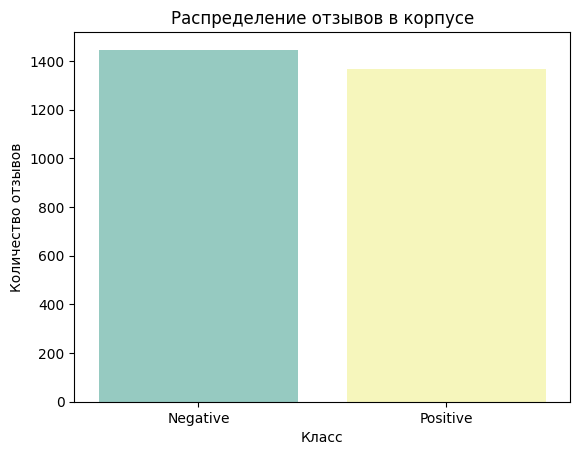

In [ ]:
#plt.figure(figsize=(15, 5))
plt.title("Распределение отзывов в корпусе")
plt.ylabel("Количество отзывов")
plt.xlabel("Класс")
plot = sns.countplot(data = df, x = 'Class', hue = 'Class', palette='Set3')

# **Word2Vec**

## ***Препроцессинг***

In [ ]:
def normalization(text): # препроцессинг для Word2Vec
    text = text.lower()
    text = re.sub('[0-9]+', 'num', text) # заменяем все числа
    text = text.replace('num из num', '')
    text = text.replace('num', '')
    text = re.sub('\\n', ' ', text)
    text = mystem.lemmatize(text)
    text = re.sub(r'\W', ' ', str(text)).split() # деление на токены
    text =  [usword for usword in list(text) if usword not in add_stop_ne] # удаляем стоп-слова
    return text

In [ ]:
df['Clean_text'] = df['Text'].apply(normalization)

In [ ]:
df

,Unnamed: 0,Text,Class,Film,Clean_text
0,0,Фантастические твари: Преступления Грин-де-Вал...,Negative,Фантастические твари: Преступления Грин-де-Вальда,"[фантастический, тварь, преступление, грин, де..."
1,1,"После первой части, которая лично на мой взгля...",Negative,Фантастические твари: Преступления Грин-де-Вальда,"[часть, лично, взгляд, получаться, относительн..."
2,2,"Ну начнем с того, что мне нравятся все фильмы ...",Negative,Фантастические твари: Преступления Грин-де-Вальда,"[начинать, нравиться, фильм, гарри, поттер, ча..."
3,3,Фильм «Фантастические твари и где они обитают»...,Negative,Фантастические твари: Преступления Грин-де-Вальда,"[фильм, фантастический, тварь, обитать, расска..."
4,4,Оригинальные фильмы по этой киновселенной не в...,Negative,Фантастические твари: Преступления Грин-де-Вальда,"[оригинальный, фильм, киновселенная, не, соотв..."
...,...,...,...,...,...
2806,2806,"Мир СССР – это то, что не входит ни в какие ра...",Positive,Груз 200,"[мир, ссср, не, входить, ни, рамка, не, подчин..."
2807,2807,Груз 200 для меня не чернуха и не шедевр. А уж...,Positive,Груз 200,"[груз, не, чернуха, не, шедевр, говорить, бала..."
2808,2808,"Если сказать, что фильм жесткий, то нечего не ...",Positive,Груз 200,"[фильм, жесткий, нечего, не, видимо, хотеться,..."
2809,2809,"Фильм действительно больной, но он показывает ...",Positive,Груз 200,"[фильм, больной, показывать, беспредел, творит..."


In [ ]:
#texts_for_doc2vec = [re.findall('\w+', i) for i in texts]

In [ ]:
df.iloc[555]['Text']

"Признаюсь честно, что комикс я не читал. Возможно, что это и стало причиной того, что я кое-что не понял. Но в целом, не беря в расчёт некоторые детали, фильм мне понравился и ушёл я с сеанса полностью удовлетворенный. \n\nНачнём с плюсов: \n\n— Марго Робби. . Она шикарно сыграла роль сумасшедшей подружки Джокера (о нём позже). Несмотря на то, что Харлин вышла у неё не особо хорошо, Харли получилась превосходной. Безумная и прекрасная. И весьма агрессивная. Я не знаю в какую пару я влюбился больше: в Харли и Джокера или в Харли и биту. От этого персонажа я долго не мог отойти, в такую Королеву я просто влюбился. \n\n— Эль Диабло (Джей Эрнандес) и Дэдшот (Уилл Смит).  Финальная сцена с Эль Диабло вышла очень горячей, характер этого персонажа мне понравился ещё с первой минуты его появления на экране. Заслуга актера или просто моя впечатлительность — но за Чато ставлю несомненный плюс. Дэдшот шикарен. Вот просто превосходный. Каждая сцена с ним невероятна. Не персонаж, а сокровище. \n\n

In [ ]:
df.iloc[555]['Clean_text']

['признаваться',
 'честно',
 'комикс',
 'не',
 'читать',
 'возможно',
 'становиться',
 'причина',
 'кое',
 'не',
 'понимать',
 'целое',
 'не',
 'брать',
 'расчет',
 'некоторые',
 'деталь',
 'фильм',
 'понравиться',
 'уходить',
 'сеанс',
 'полностью',
 'удовлетворять',
 'начинать',
 'плюс',
 'марго',
 'робби',
 'шикарно',
 'сыграть',
 'роль',
 'сумасшедший',
 'подружка',
 'джокер',
 'поздно',
 'несмотря',
 'харлин',
 'выходить',
 'не',
 'особо',
 'харли',
 'получаться',
 'превосходный',
 'безумный',
 'прекрасный',
 'весьма',
 'агрессивный',
 'не',
 'знать',
 'пара',
 'влюбляться',
 'харли',
 'джокер',
 'харли',
 'бита',
 'персонаж',
 'не',
 'отходить',
 'королева',
 'влюбляться',
 'эль',
 'диабло',
 'джей',
 'эрнандес',
 'дэдшот',
 'уилл',
 'смит',
 'финальный',
 'сцена',
 'эль',
 'диабло',
 'выходить',
 'очень',
 'горячий',
 'характер',
 'персонаж',
 'понравиться',
 'минута',
 'появление',
 'экран',
 'заслуга',
 'актер',
 'впечатлительность',
 'чато',
 'ставить',
 'несомненный',
 'плюс

## ***Word2vec***

In [ ]:
import gensim.models
from gensim.models import Word2Vec

In [ ]:
# первая модель

In [ ]:
model = Word2Vec(sentences = df['Clean_text'],
                min_count=5,
                 vector_size = 50)

In [ ]:
#model.wv['фильм']

In [ ]:
model.wv.most_similar('фильм')

[('картина', 0.8458169102668762),
 ('лента', 0.7679306864738464),
 ('кино', 0.7535366415977478),
 ('таки', 0.7505614757537842),
 ('трейлер', 0.7466400861740112),
 ('сериал', 0.7372709512710571),
 ('комедия', 0.7313078045845032),
 ('мувь', 0.7223500609397888),
 ('скучно', 0.7181795239448547),
 ('следовать', 0.7127696871757507)]

In [ ]:
model.wv.most_similar('хороший')

[('плохой', 0.8225890398025513),
 ('отличный', 0.7933906316757202),
 ('замечательный', 0.7743943333625793),
 ('достойный', 0.7647672295570374),
 ('удачный', 0.7629566788673401),
 ('неплохой', 0.7595588564872742),
 ('поклон', 0.7498113512992859),
 ('качественный', 0.7449647784233093),
 ('приятный', 0.7419791221618652),
 ('добротно', 0.7413748502731323)]

In [ ]:
model.wv.most_similar('великолепный')

[('шикарный', 0.954386293888092),
 ('декорация', 0.9535491466522217),
 ('подобранный', 0.9527344107627869),
 ('сопровождение', 0.9520798325538635),
 ('высота', 0.9517781734466553),
 ('похвала', 0.950883150100708),
 ('трек', 0.9454498291015625),
 ('композиция', 0.9436547756195068),
 ('потрясать', 0.943223774433136),
 ('график', 0.9412509202957153)]

In [ ]:
model.wv.most_similar('интересный')

[('скучный', 0.8783059120178223),
 ('слабый', 0.8465946316719055),
 ('достаточно', 0.8430248498916626),
 ('скомкивать', 0.8392310738563538),
 ('показываться', 0.8322585821151733),
 ('удачный', 0.8245050311088562),
 ('главное', 0.8227505683898926),
 ('яркий', 0.8172835111618042),
 ('необычный', 0.8167178630828857),
 ('присутствовать', 0.8023337125778198)]

In [ ]:
model.wv.most_similar('плохой')

[('называть', 0.8263788223266602),
 ('хороший', 0.8225889205932617),
 ('ужасный', 0.8137120008468628),
 ('считать', 0.7761000990867615),
 ('подражание', 0.7748194932937622),
 ('малевать', 0.7611432075500488),
 ('нельзя', 0.7593307495117188),
 ('плохо', 0.7544773817062378),
 ('оказываться', 0.7542895674705505),
 ('наверное', 0.7449544072151184)]

In [ ]:
model.wv.most_similar('глупый')

[('тупой', 0.947981595993042),
 ('ненужный', 0.928612470626831),
 ('пустой', 0.9247878789901733),
 ('логика', 0.9192136526107788),
 ('пошлый', 0.918249785900116),
 ('примитивный', 0.9149376749992371),
 ('плоский', 0.906829833984375),
 ('пафосный', 0.9062680602073669),
 ('нужный', 0.9059299230575562),
 ('непонятный', 0.9058576822280884)]

In [ ]:
model.wv.most_similar('скучный')

[('пустой', 0.9275809526443481),
 ('скомкивать', 0.9268158078193665),
 ('слабый', 0.9124964475631714),
 ('затягивать', 0.9074353575706482),
 ('присутствовать', 0.9053980112075806),
 ('пошлый', 0.9011961817741394),
 ('предсказуемый', 0.8950088024139404),
 ('неинтересный', 0.8933953046798706),
 ('глупый', 0.8927557468414307),
 ('отсутствовать', 0.8886945843696594)]

In [ ]:
model.wv.most_similar('ожидание')

[('оправдывать', 0.9388433694839478),
 ('потратить', 0.9330139756202698),
 ('завышать', 0.9324949979782104),
 ('рейтинг', 0.9324893951416016),
 ('оправдываться', 0.9304379820823669),
 ('трата', 0.9303368926048279),
 ('оценивать', 0.9274740219116211),
 ('шедевр', 0.9273739457130432),
 ('критик', 0.9203957915306091),
 ('негативный', 0.9144673347473145)]

In [ ]:
model.wv.most_similar('эмоция')

[('вызывать', 0.8811977505683899),
 ('отвращение', 0.8769156336784363),
 ('особый', 0.8677172660827637),
 ('никакой', 0.8423066735267639),
 ('симпатия', 0.827045738697052),
 ('чувство', 0.8223613500595093),
 ('смех', 0.8157055377960205),
 ('нарекание', 0.8088268041610718),
 ('капля', 0.8034818768501282),
 ('буря', 0.7933713793754578)]

In [ ]:
model.wv.most_similar('впечатление')

[('складываться', 0.8904955387115479),
 ('производить', 0.8706438541412354),
 ('двоякий', 0.8705806136131287),
 ('положительный', 0.8631339073181152),
 ('оставлять', 0.8610069155693054),
 ('ощущение', 0.8604573011398315),
 ('неизгладимый', 0.8423545360565186),
 ('создаваться', 0.8404231071472168),
 ('большинство', 0.8396351933479309),
 ('просмотр', 0.8382777571678162)]

In [ ]:
# вторая модель

In [ ]:
len(df['Clean_text'])

2811

In [ ]:
w2v_model = Word2Vec(min_count=5,
                     window=2,
                     sample=1e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20)

In [ ]:
w2v_model.build_vocab(df['Clean_text'])

In [ ]:
w2v_model.corpus_count

2811

In [ ]:
%%time
w2v_model.train(df['Clean_text'], total_examples=w2v_model.corpus_count, epochs=50)

CPU times: user 1min 14s, sys: 225 ms, total: 1min 14s
Wall time: 55.1 s


(9290601, 33696900)

In [ ]:
w2v_model.wv.most_similar('фильм')

[('положительный', 0.9114924073219299),
 ('предвзято', 0.9082949757575989),
 ('многий', 0.9052183628082275),
 ('большинство', 0.897258996963501),
 ('многие', 0.8954935073852539),
 ('отрицательный', 0.8940366506576538),
 ('оценивать', 0.8886215686798096),
 ('обо', 0.8839715719223022),
 ('пожалеть', 0.8835738301277161),
 ('двоякий', 0.8815933465957642)]

In [ ]:
w2v_model.wv.most_similar('хороший')

[('потрясающий', 0.8745946884155273),
 ('портить', 0.8660706281661987),
 ('разноплановый', 0.8651592135429382),
 ('бесспорно', 0.8581441044807434),
 ('отличный', 0.8566837310791016),
 ('неплохой', 0.8550877571105957),
 ('очень', 0.8506837487220764),
 ('претензия', 0.8499362468719482),
 ('добротно', 0.8444634079933167),
 ('целое', 0.841264545917511)]

In [ ]:
w2v_model.wv.most_similar('великолепный')

[('отмечать', 0.9086846709251404),
 ('подобранный', 0.8921162486076355),
 ('костюмер', 0.8846302628517151),
 ('особенно', 0.8842787742614746),
 ('аплодисменты', 0.8798977136611938),
 ('потрясать', 0.8792583346366882),
 ('похвала', 0.878947377204895),
 ('подбирать', 0.8769439458847046),
 ('бесподобный', 0.8714666962623596),
 ('восхитительный', 0.8703504204750061)]

In [ ]:
w2v_model.wv.most_similar('интересный')

[('интересно', 0.9120535850524902),
 ('радовать', 0.859902024269104),
 ('отличаться', 0.8570535778999329),
 ('вменяемый', 0.8570528626441956),
 ('сравнительно', 0.8533435463905334),
 ('присутствовать', 0.852040708065033),
 ('лишний', 0.8517164587974548),
 ('наблюдать', 0.8502986431121826),
 ('неинтересный', 0.848274290561676),
 ('практически', 0.8465838432312012)]

In [ ]:
w2v_model.wv.most_similar('плохой')

[('сожаление', 0.895706832408905),
 ('пустышка', 0.8942946195602417),
 ('плохо', 0.8889319896697998),
 ('сделать', 0.883078396320343),
 ('задумка', 0.8826680779457092),
 ('конкретно', 0.8781494498252869),
 ('жаловаться', 0.8676155209541321),
 ('ибо', 0.8665779829025269),
 ('точно', 0.8643201589584351),
 ('половина', 0.8642032146453857)]

In [ ]:
w2v_model.wv.most_similar('глупый')

[('плоский', 0.881139874458313),
 ('идиотский', 0.8719794154167175),
 ('нормальный', 0.8707965016365051),
 ('глупость', 0.8502689003944397),
 ('примитивный', 0.8430450558662415),
 ('тупой', 0.8423328995704651),
 ('смешно', 0.8380249738693237),
 ('нелепый', 0.8379337787628174),
 ('дебильный', 0.8328732848167419),
 ('смешить', 0.8320819735527039)]

In [ ]:
w2v_model.wv.most_similar('скучный')

[('диалог', 0.9385420083999634),
 ('скучно', 0.9288145303726196),
 ('неинтересный', 0.9253897666931152),
 ('затягивать', 0.9172016382217407),
 ('присутствовать', 0.909705400466919),
 ('неуместный', 0.907849133014679),
 ('затянутый', 0.9061583876609802),
 ('некоторый', 0.905816376209259),
 ('предсказуемый', 0.9005622863769531),
 ('отсутствовать', 0.8989893198013306)]

In [ ]:
w2v_model.wv.most_similar('ожидание')

[('оправдываться', 0.9610381126403809),
 ('завышать', 0.9608679413795471),
 ('возлагать', 0.9568027257919312),
 ('оправдывать', 0.9514876008033752),
 ('однозначный', 0.9367126822471619),
 ('итог', 0.9328246712684631),
 ('сырой', 0.9225069880485535),
 ('провал', 0.9188588261604309),
 ('конечный', 0.9176978468894958),
 ('ругать', 0.912860631942749)]

In [ ]:
w2v_model.wv.most_similar('эмоция')

[('неудачно', 0.8784326314926147),
 ('переживание', 0.8655322194099426),
 ('передавать', 0.8633692860603333),
 ('взгляд', 0.863261878490448),
 ('эмоциональный', 0.8582464456558228),
 ('наигранность', 0.8501013517379761),
 ('чувство', 0.8432881236076355),
 ('касаться', 0.833748996257782),
 ('моему', 0.8333576321601868),
 ('достойно', 0.8330654501914978)]

In [ ]:
w2v_model.wv.most_similar('впечатление')

[('двоякий', 0.9068706035614014),
 ('оставлять', 0.8970739841461182),
 ('первых', 0.8929286599159241),
 ('производить', 0.8919293880462646),
 ('пожалеть', 0.8903762698173523),
 ('положительный', 0.8885424733161926),
 ('трудно', 0.8857192993164062),
 ('таки', 0.8824541568756104),
 ('недочет', 0.8808058500289917),
 ('оценивать', 0.8754609227180481)]

In [ ]:
# третья модель

In [ ]:
w2v_model_1 = Word2Vec(min_count=10,
                       window=2,
                       sample=6e-5,
                       alpha=0.03,
                       min_alpha=0.0007,
                       negative=10,
                       vector_size=300)

In [ ]:
w2v_model_1.build_vocab(df['Clean_text'])

In [ ]:
w2v_model_1.corpus_count

2811

In [ ]:
%%time
w2v_model_1.train(df['Clean_text'], total_examples=w2v_model_1.corpus_count, epochs=50)

CPU times: user 1min 46s, sys: 315 ms, total: 1min 47s
Wall time: 1min 8s


(16455089, 33696900)

In [ ]:
w2v_model_1.wv.most_similar('фильм')

[('картина', 0.5395305752754211),
 ('кино', 0.4193531274795532),
 ('повторный', 0.35381293296813965),
 ('лента', 0.3347266912460327),
 ('часть', 0.3206128478050232),
 ('однозначный', 0.3195804953575134),
 ('разгром', 0.3185574412345886),
 ('раскритиковывать', 0.31524887681007385),
 ('обрадовать', 0.3135303556919098),
 ('слабоватый', 0.3078865110874176)]

In [ ]:
w2v_model_1.wv.most_similar('хороший')

[('плохой', 0.41521888971328735),
 ('отличный', 0.3937132656574249),
 ('неплохой', 0.3369726240634918),
 ('приятный', 0.3286723792552948),
 ('смотрибельный', 0.321657657623291),
 ('великолепный', 0.31475168466567993),
 ('годный', 0.3100278675556183),
 ('неплохо', 0.3094988763332367),
 ('средненький', 0.3081219494342804),
 ('прекрасный', 0.3050242066383362)]

In [ ]:
w2v_model_1.wv.most_similar('великолепный')

[('оскароносный', 0.45662322640419006),
 ('бесподобный', 0.4453449249267578),
 ('умопомрачительный', 0.4297030568122864),
 ('прекрасный', 0.4124279320240021),
 ('отличный', 0.407025545835495),
 ('блестящий', 0.39772719144821167),
 ('шикарный', 0.38737496733665466),
 ('потрясать', 0.3839149475097656),
 ('ансамбль', 0.3723447024822235),
 ('восхитительный', 0.37140849232673645)]

In [ ]:
w2v_model_1.wv.most_similar('интересный')

[('увлекательно', 0.3572932183742523),
 ('яркий', 0.3549859821796417),
 ('выверять', 0.3543079197406769),
 ('интриговать', 0.3540975749492645),
 ('запутывать', 0.34550923109054565),
 ('незамысловатый', 0.3446356952190399),
 ('захватывающий', 0.3430876135826111),
 ('увлекательный', 0.3428833782672882),
 ('колоритный', 0.3406181335449219),
 ('смотрибельный', 0.3401954174041748)]

In [ ]:
w2v_model_1.wv.most_similar('плохой')

[('хороший', 0.41521885991096497),
 ('ужасный', 0.32918602228164673),
 ('дорабатывать', 0.32795432209968567),
 ('средненький', 0.32523679733276367),
 ('сырой', 0.3234919607639313),
 ('отвратительный', 0.311255544424057),
 ('высокобюджетный', 0.3054351806640625),
 ('неважный', 0.29661819338798523),
 ('боевичок', 0.29545363783836365),
 ('слабый', 0.29480206966400146)]

In [ ]:
w2v_model_1.wv.most_similar('глупый')

[('плохой', 0.41521888971328735),
 ('отличный', 0.3937132656574249),
 ('неплохой', 0.3369726240634918),
 ('приятный', 0.3286723792552948),
 ('смотрибельный', 0.321657657623291),
 ('великолепный', 0.31475168466567993),
 ('годный', 0.3100278675556183),
 ('неплохо', 0.3094988763332367),
 ('средненький', 0.3081219494342804),
 ('прекрасный', 0.3050242066383362)]

In [ ]:
w2v_model_1.wv.most_similar('скучный')

[('неинтересный', 0.5704101324081421),
 ('затянутый', 0.4526252746582031),
 ('невыразительный', 0.4381314516067505),
 ('вялый', 0.43786871433258057),
 ('затягивать', 0.4316987097263336),
 ('нудный', 0.4150521457195282),
 ('невыносимый', 0.4023784101009369),
 ('картонный', 0.4005521535873413),
 ('нереалистичный', 0.3955780565738678),
 ('пресный', 0.39006584882736206)]

In [ ]:
w2v_model_1.wv.most_similar('ожидание')

[('завышать', 0.5207897424697876),
 ('оправдываться', 0.51273113489151),
 ('возлагать', 0.4913398027420044),
 ('надежда', 0.4329644441604614),
 ('оправдывать', 0.4150153696537018),
 ('возлагаться', 0.3972506523132324),
 ('требование', 0.36615103483200073),
 ('самооценка', 0.3533799946308136),
 ('синдром', 0.3480239808559418),
 ('опасение', 0.3432644009590149)]

In [ ]:
w2v_model_1.wv.most_similar('эмоция')

[('буря', 0.5038940906524658),
 ('жалость', 0.4406687021255493),
 ('заряд', 0.4278603196144104),
 ('волнение', 0.41507983207702637),
 ('палитра', 0.3879060745239258),
 ('чувство', 0.380935400724411),
 ('отклик', 0.38058704137802124),
 ('трагизм', 0.37954089045524597),
 ('сопереживание', 0.3650093972682953),
 ('смятение', 0.3645820617675781)]

In [ ]:
w2v_model_1.wv.most_similar('впечатление')

[('ощущение', 0.5379430651664734),
 ('двоякий', 0.3784200847148895),
 ('заметка', 0.3706952631473541),
 ('негодовать', 0.36935001611709595),
 ('порекомендовать', 0.36735525727272034),
 ('осадок', 0.3447228968143463),
 ('просмотр', 0.337080717086792),
 ('заряд', 0.3335321843624115),
 ('целостность', 0.3213854134082794),
 ('производить', 0.3118857443332672)]

ВОЗМОЖНО ДОБАВИТЬ T-SNE визуализацию

# **Машинное обучение**

# ***Обучение на данных с препроцессингом***

In [ ]:
def preprocess_ML(text): # препроцессинг
    text = text.lower()
    text = re.sub('[a-zA-Z]', '', text) # уберем латиницу
    text = re.sub('[0-9]+', 'num', text) # заменим все числа
    text = text.replace('num из num', '')
    text = text.replace('num', '')
    text = re.sub('\\n', ' ', text)
    text = mystem.lemmatize(text)
    text = re.sub(r'\W', ' ', str(text)).split() # деление на токены
    text =  [wrd for wrd in text if wrd not in ner_list] # удаляем NER
    text =  [usword for usword in text if usword not in add_stop_ne] # удаляем стоп-слова
    #text =  [wrd for wrd in text if wrd not in ner_list] # удаляем NER
    #text = [w for w in text if len(w) >= 3] # удаляем слова короче 3-х символов
    result_text = ' '.join(text)
    return result_text

In [ ]:
df['Text_lem'] = df['Text'].apply(preprocess_ML)

In [ ]:
df

,Unnamed: 0,Text,Class,Film,Text_lem
0,0,Фантастические твари: Преступления Грин-де-Вал...,Negative,Фантастические твари: Преступления Грин-де-Вальда,фантастический тварь преступление вальд уникал...
1,1,"После первой части, которая лично на мой взгля...",Negative,Фантастические твари: Преступления Грин-де-Вальда,часть лично взгляд получаться относительно сре...
2,2,"Ну начнем с того, что мне нравятся все фильмы ...",Negative,Фантастические твари: Преступления Грин-де-Вальда,начинать нравиться фильм поттер часть тварь те...
3,3,Фильм «Фантастические твари и где они обитают»...,Negative,Фантастические твари: Преступления Грин-де-Вальда,фильм фантастический тварь обитать рассказыват...
4,4,Оригинальные фильмы по этой киновселенной не в...,Negative,Фантастические твари: Преступления Грин-де-Вальда,оригинальный фильм киновселенная не соответств...
...,...,...,...,...,...
2806,2806,"Мир СССР – это то, что не входит ни в какие ра...",Positive,Груз 200,мир не входить ни рамка не подчиняться никакой...
2807,2807,Груз 200 для меня не чернуха и не шедевр. А уж...,Positive,Груз 200,груз не не шедевр говорить переплевывать триер...
2808,2808,"Если сказать, что фильм жесткий, то нечего не ...",Positive,Груз 200,фильм жесткий нечего не видимо хотеться закрыв...
2809,2809,"Фильм действительно больной, но он показывает ...",Positive,Груз 200,фильм больной показывать беспредел твориться п...


In [ ]:
df['Text_lem'][12]

'поклонник вселенная поттер ждать продолжение серия фильм фантастический тварь завлекать трейлер видеть знакомый персонаж молодой жесткий противостояние великий маг новый антагонист центр полюбиться герой поклонник толпа бежать кино число итог фильм понравиться эмоция просмотр возникать любой поклонник данный лента начинать углубляться самый невзирая любовь данный вселенная пытаться объективно оценивать фильм приходить вывод ни не знать вообще сильный косяк сценарий намеренный желание продлять франшиза ради деньги получаться большинство происходить простой выкидывать оставлять конец начало простой рассказывать экспозиция ничто не изменяться становиться непонятно фильм называться фантастический тварь главный герой фильм саламандер главный герой фильм правило отличаться остальной остальной либо аспект обладать уникальный характер способности боевик самый крутой добрый мужик утопия фантастика либо избранный проводить параллель поттер уникальный интересный делать факт избранный не понимать

In [ ]:
df['Text'][12]

"Два года все поклонники вселенной Гарри Поттера ждали продолжение серии фильмов 'Фантастический твари'. Нас завлекали трейлерами, в которых мы видели уже знакомых нам персонажей. Молодые Дамблдор и Гриндевальд. Жесткое противостояние двух величайших магов того времени, новый антагонист и в центре всего этого уже полюбившиеся всем нам герои. Все поклонники Поттерианы толпами бежали в кино, и я в том числе. Но что в итоге?\n\nФильм мне понравился, но это лишь эмоции после просмотра, которые возникнут у любого поклонника данной ленты, но если начать углубляться в самую суть, невзирая на любовь к данной вселенной и пытаться объективно оценить этот фильм, то можно прийти к выводу, что он просто ни о чем...\n\nЯ не знаю, что это вообще было: сильные косяки в сценарии или намеренное желание продлить франшизу ради денег, но получилось так, что большинство происходящего можно прост выкинуть, оставить только конец и начало, или же прост рассказать их экспозицией, и ничего бы не изменилось. \n\n

In [ ]:
X = df['Text_lem']
y = df['Class'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    shuffle=True,
                                                    test_size=0.2,
                                                    random_state=42) # разделим выборку на тестовое и тренировочное множество

## ***Векторизация***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

**CountVectorizer**

In [ ]:
count = CountVectorizer()

In [ ]:
count.fit(X_train)

CountVectorizer()

In [ ]:
X_train_vec = count.transform(X_train)
X_test_vec =  count.transform(X_test)

**TF-IDF**

In [ ]:
tf_idf = TfidfVectorizer()

In [ ]:
tf_idf.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_tf_idf = tf_idf.transform(X_train)
X_test_tf_idf =  tf_idf.transform(X_test)

## ***LabelEncoder***

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array(['Negative', 'Positive'], dtype='<U8')

In [ ]:
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

## ***Классификация***

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## *MultinomialNB*

In [ ]:
from sklearn.naive_bayes import MultinomialNB

### **CountVectorizer**

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train_vec, y_train_le)

MultinomialNB()

In [ ]:
y_test_pred_mnb = mnb.predict(X_test_vec)

In [ ]:
le.classes_

array(['Negative', 'Positive'], dtype='<U8')

In [ ]:
print(classification_report(y_test_le, y_test_pred_mnb, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.85      0.83      0.84       290
    Positive       0.83      0.85      0.84       273

    accuracy                           0.84       563
   macro avg       0.84      0.84      0.84       563
weighted avg       0.84      0.84      0.84       563



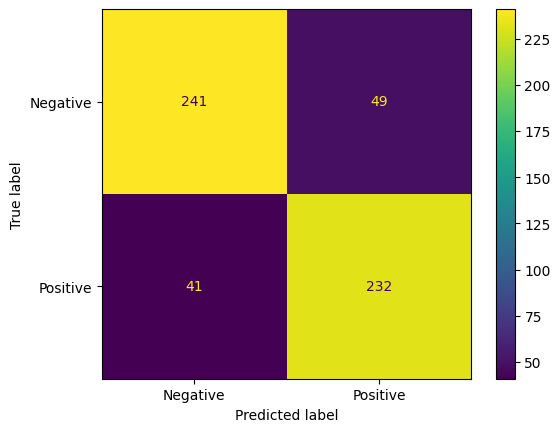

In [ ]:
cm_1 = confusion_matrix(y_test_le, y_test_pred_mnb)
cm_display_1 = ConfusionMatrixDisplay(cm_1, display_labels=le.classes_).plot()

### **TF-IDF**

In [ ]:
mnb_tf = MultinomialNB()

In [ ]:
mnb_tf.fit(X_train_tf_idf, y_train_le)

MultinomialNB()

In [ ]:
y_test_pred_mnb_tf = mnb_tf.predict(X_test_tf_idf)

In [ ]:
print(classification_report(y_test_le, y_test_pred_mnb_tf, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84       290
    Positive       0.85      0.77      0.81       273

    accuracy                           0.83       563
   macro avg       0.83      0.82      0.82       563
weighted avg       0.83      0.83      0.83       563



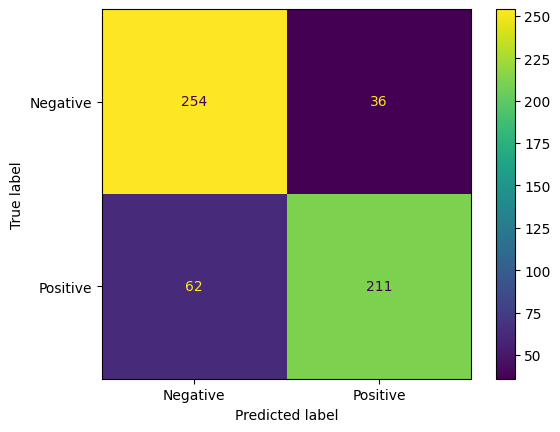

In [ ]:
cm_tf_idf = confusion_matrix(y_test_le, y_test_pred_mnb_tf)
cm_display_tf_idf = ConfusionMatrixDisplay(cm_tf_idf, display_labels=le.classes_).plot()

### ***Применение обученной модели на рандомных отзывах с сайта Кинопоиск***

In [ ]:
from sklearn.pipeline import Pipeline

**CountVectorizer**

In [ ]:
pipe = Pipeline([('count', CountVectorizer()),
                 ('mnb', MultinomialNB())])

In [ ]:
pipe.fit(X, y)

Pipeline(steps=[('count', CountVectorizer()), ('mnb', MultinomialNB())])

In [ ]:
# Фильм "Криминальное чтиво" (отзыв положительный)
film_1 = '''Культовый фильм одного из самых лучших режиссеров современности. Картина разошлась на цитаты и мемы по всему миру. Однако, чтобы после просмотра вы не пожалели о потраченном времени, нужно очень внимательно вслушиваться в каждый диалог, дабы уловить весь смысл происходящего на экране.
В первую очередь, стоит отметить, что Тарантино очень талантливо миксует комедию с преступлением, делая это через живые беседы главных героев. Лично для меня в этом и есть вся гениальность режиссера. Он высмеивает составляющую криминального мира, потешается над банальным стереотипным видом общения, будь то формальные ситуации или бытовые. В главных героях мы наблюдаем типовое поведение в различных обстановках, которое они превращают в черный юмор.

Огромный плюс кинокартины, что это не очередная бомбежка в друг друга, а очень хорошая гангстерская лента со своей философией, которая заложена буквально в каждой фразе. Именно поэтому фильм является одним из лучших в своем жанре. Кому-то он может показаться слишком нудным и длинным, и с большой вероятностью это будет из-за того, что лента не похожа на типичное криминальное кино. Здесь есть о чем подумать, поднимаются темы морали, верности, поиска себя и жизненного смысла.

Криминальное чтиво - это, безусловно, картина, которая является сплошным режиссерским почерком Квентина Тарантино. Особенно если вы не знакомы с творчеством данного режиссера, то этот шедевр вполне подойдет для знакомства с работами великого мастера криминальным драм. В киноленте он использует свои излюбленные приемы, такие как нижний ракурс или мексиканский тупик.

Резюмируя все вышесказанное, можно прийти к выводу, что данная картина - это вовсе не шаблонный фильм, в котором очень много эстетизации насилия и крови. Это очень интересная смесь юмора и иронии с кровавым постмодернистским боевиком.'''

In [ ]:
film_clean_1 = preprocess_ML(film_1) # применим препроцессинг
film_clean_1

'культовый фильм самый хороший режиссер современность картина расходиться цитата мема мир просмотр не пожалеть потратить очень внимательно вслушиваться диалог дабы улавливать смысл происходить экран очередь стоить отмечать очень талантливо миксовать комедия преступление делать живой беседа главный герой лично гениальность режиссер высмеивать составлять криминальный мир потешаться банальный стереотипный вид общение формальный ситуация бытовой главный герой наблюдать типовой поведение различный обстановка превращать черный юмор огромный плюс кинокартина не очередной бомбежка друг друг очень хороший гангстерский лента философия закладывать буквально фраза поэтому фильм являться хороший жанр показываться нудный длинный большой вероятность лента не похожий типичный криминальный кино подумать подниматься тема мораль верность поиск жизненный смысл криминальный чтиво безусловно картина являться сплошной режиссерский почерк особенно не знакомый творчество данный режиссер шедевр вполне подходить

In [ ]:
pipe.predict(['''
культовый фильм самый хороший режиссер современность картина расходиться цитата мема мир просмотр не пожалеть потратить очень внимательно вслушиваться диалог дабы улавливать смысл происходить экран очередь стоить отмечать очень талантливо миксовать комедия преступление делать живой беседа главный герой лично гениальность режиссер высмеивать составлять криминальный мир потешаться банальный стереотипный вид общение формальный ситуация бытовой главный герой наблюдать типовой поведение различный обстановка превращать черный юмор огромный плюс кинокартина не очередной бомбежка друг друг очень хороший гангстерский лента философия закладывать буквально фраза поэтому фильм являться хороший жанр показываться нудный длинный большой вероятность лента не похожий типичный криминальный кино подумать подниматься тема мораль верность поиск жизненный смысл криминальный чтиво безусловно картина являться сплошной режиссерский почерк особенно не знакомый творчество данный режиссер шедевр вполне подходить знакомство работа великий мастер криминальный драма кинолента использовать излюбленный прием нижний ракурс мексиканский тупик резюмировать вышесказанный приходить вывод данный картина вовсе не шаблонный фильм очень эстетизация насилие кровь очень интересный смесь юмор ирония кровавый постмодернистский боевик
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Король говорит" (отзыв отрицательный)
film_2 = '''
Боже, какой унылый фильм и слов нет выразить.

Начну с самого начала. Том Хупер, режиссер таких картин как 'Отверженные', 'Проклятый Юнайтед', попытается нас пронести сквозь историю из жизни короля Георга VI, где он собственно становится королем. Чем же так примечателен этот отрезок жизни, и в чем собственно драма фильма? Где конфликт, о чем мать его этот фильм??

Режиссер пытается передать всю тяжесть и ношу проблем Георга, а именно речевые дефекты, заикания. Бедному королю пришлось пережить такую проблему, ему пришлось проводить уроки у логопеда, о ужас! Представляете? Он прошел немало учителей, но нашел вдруг хорошего, который заставил хорошенько потренироваться бедного короля, у которого так много дел.. например подписывать бумаги по просьбе премьер-министра.

Чуть не забыл, в фильме же еще есть другая линия сюжета, это конфликт с братом. А точнее его отсутствие... великая проблема брата в том, что он хочет женится на девушке легкого поведения... вот это драма! И по собственному желанию передает престол своему любимому брату, это происходит без крови и скандалов, но режиссер почему то предлагает нам смотреть на это как на какую-то трагедию... волнующая музыка... медленно протекающий сюжет о том, как брат очень медленно становится королем, не желая этого. Вот так проблема.

Не обошлось и без упоминаний о трудном детстве где няня щипала и голодом морила бедняжку и что брат тролил, да вот только человек вырос здоровым, а отношения с братом стали крепкими, что как бы намекает что все эти жалобы - сущее нытье.. В общем не жизнь, а трагедия. Любящая красавица жена, огромные замки, статус короля, красивые дети, роскошь и имущество, все это ничто по сравнению с дефектами речи и проблемой, что придется брать ответственность брата на себя. В конце оказалось, что все же тренировки прошли не так плохо и он таки преодолел. Кульминация.

Вся приятная картинка этого фильма - отличные актеры, которые могут выжить из себя слезинку, да красивые локации. ГДЕ сюжет? ГДЕ история? Ради чего мы все тут собрались? Непонятно.

В общем фильм отстой редкостный, сначала я пожалел о потраченном времени, и даже не хотел тратить время на рецензию. Но позже, когда я увидел 4 оскара, imdb 8, понял что все таки этот фильм учит многому. Тому, что оскар не всегда прав, бывает политическим, не знаю как но даже рейтинги могут быть смещены, некими силами. Возможно проплаченными журналами или еще чем-то, но их можно сместить. Этот фильм напомнил мне фильм 'темные времена', которые тоже был таким же унылыми английским детищем, где просто обсасывалась фигура Черчилля, мол какой он хороший. Я тогда тоже подумал, что явно госзаказ какой-то, приподнять патриотизм народа.

Короче твердая шестерка этому фильму и валеты на погоны Хупера.
'''

In [ ]:
film_clean_2 = preprocess_ML(film_2) # применим препроцессинг
film_clean_2

'боже унылый фильм слово нет выражать начинать самый начало режиссер картина отверженный проклятый юнайтед попытаться пронести сквозь история король собственно становиться король примечательный отрезок собственно драма фильм конфликт мать фильм режиссер пытаться передавать тяжесть носить проблема речевой дефект заикание бедный король приходиться переживать проблема приходиться проводить урок логопед ужас представлять проходить немало учитель находить хороший заставлять хорошенько потренироваться бедный король дело например подписывать бумага просьба премьер министр не забывать фильм линия сюжет конфликт брат точно отсутствие великий проблема брат жениться девушка легкий поведение драма собственный желание передавать престол любимый брат происходить без кровь скандал режиссер предлагать смотреть трагедия волнующий музыка медленно протекать сюжет брат очень медленно становиться король не желать проблема не обходиться без упоминание трудный детство няня щипать голод морить бедняжка брат т

In [ ]:
pipe.predict(['''
боже унылый фильм слово нет выражать начинать самый начало режиссер картина отверженный проклятый юнайтед попытаться пронести сквозь история король собственно становиться король примечательный отрезок собственно драма фильм конфликт мать фильм режиссер пытаться передавать тяжесть носить проблема речевой дефект заикание бедный король приходиться переживать проблема приходиться проводить урок логопед ужас представлять проходить немало учитель находить хороший заставлять хорошенько потренироваться бедный король дело например подписывать бумага просьба премьер министр не забывать фильм линия сюжет конфликт брат точно отсутствие великий проблема брат жениться девушка легкий поведение драма собственный желание передавать престол любимый брат происходить без кровь скандал режиссер предлагать смотреть трагедия волнующий музыка медленно протекать сюжет брат очень медленно становиться король не желать проблема не обходиться без упоминание трудный детство няня щипать голод морить бедняжка брат троливать вырастать здоровый отношение брат становиться крепкий намекать жалоба сущий нытье общий не трагедия любить красавица жена огромный замок статус король красивый ребенок роскошь имущество ничто сравнение дефект речь проблема приходиться брать ответственность брат конец оказываться тренировка проходить не плохой таки преодолевать кульминация приятный картинка фильм отличный актер выживать слезинка красивый локация сюжет история ради собираться непонятный общий фильм отстоять редкостный пожалеть потратить не тратить рецензия поздно увидеть понимать таки фильм учить многое не правый бывать политический не знать рейтинг смещать некий сила возможно проплачивать журнал смещать фильм напоминать фильм темный унылый английский детище обсасываться фигура черчилль мол хороший подумать явно госзаказ приподымать патриотизм народ короче твердый шестерка фильм валет погон
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Сериал "Уэнсдэй" (отзыв положительный)
film_3 =  '''

Тот случай, когда результат превзошел ожидания. Хотя сразу стоит уточнить, что ждал я совсем немногого - первый трейлер не внушал особого доверия и обещал еще один сериал в духе 'Приключений Сабрины'. Что ж, приятно порой ошибиться: на выходе я получил незатейливую, но местами интересную историю с очаровательной главной героиней.

В 'Уэнсдей' полно косяков и недочетов, но на каждый минус найдется плюс. Деревянная, скучная и совершенно неубедительная Кетрин Зета Джонс в роли Мортиши? Ну и что, зато есть великолепная Ортега и крайне милый (несмотря на свою специфическую внешность) Луис Гусман (а еще Вещь и Дядя Фестер!). Пятиминутные подростковые любовные треугольники? Потерпим, ведь гораздо интереснее следить за эволюцией взаимоотношений Уэнсдей и Энид на протяжении всех восьми серий с очень трогательным финалом в последней. Куда уж там 7й серии 'Одних из нас'.

Главным же минусом сериала для меня стало отсутствие интриги. Личины злодеев угадываешь уже к пятой серии - слишком много жирных, очевидных подсказок. Это, конечно, прилично смазало впечатление от последних серий.

Однако после просмотра всё равно остается приятное послевкусие: в памяти застревают красивые планы, замысловатые декорации, интересные костюмы и приятный уху саундтрек. Но весь это аудио-визуальный фон, разумеется, не имел бы особого значения без грамотно прописанной главной героини в центре повествования. На протяжении восьми серий мы наблюдаем за взаимоотношениями Уэнсдей с её семьей и новыми знакомыми. Персонаж проходит длинный путь от замкнутого эгоистичного социфоба до человека, способного на самопожертвование во имя дружбы. Такому превращению веришь, это здорово.

И пусть часть персонажей не раскрыли, толком не рассказали про школьные группировки и уроки (это же школа, блин, кроме фехтования и растениеводства должно же еще что-то быть), а пару сюжетных веток вообще забросили на полпути (видимо, отложив их на второй сезон) - на пять часов я провалился в атмосферу подросткового фэнтези, испытав эмоции схожие с прочтением 'Ордена Феникса' в 14-летнем возрасте. Это чего-то да стоит.

'''

In [ ]:
film_clean_3 = preprocess_ML(film_3) # применим препроцессинг
film_clean_3

'случай результат превосходить ожидание сразу стоить уточнять ждать совсем немногое трейлер не внушать особый доверие обещать сериал дух приключение сабрина приятно ошибаться выход получать незатейливый место интересный история очаровательный главный героиня уэнсдей полно косяк недочет минус находиться плюс деревянный скучный совершенно неубедительный зет роль мортиша великолепный ортег крайне милый несмотря специфический внешность гусман вещь дядя фестер пятиминутный подростковый любовный треугольник потерпеть гораздо интересно следить эволюция взаимоотношение уэнсдей эниды протяжение серия очень трогательный финал последний й серия главный минус сериал становиться отсутствие интрига личина злодей угадывать серия жирный очевидный подсказка прилично смазывать впечатление последний серия просмотр равный оставаться приятный послевкусие память застревать красивый план замысловатый декорация интересный костюм приятный ухо саундтрек аудио визуальный разумеется не особый значение без грамотн

In [ ]:
# Сериал "Уэнсдэй" (отзыв положительный)
pipe.predict(['''
случай результат превосходить ожидание сразу стоить уточнять ждать совсем немногое трейлер не внушать особый доверие обещать сериал дух приключение сабрина приятно ошибаться выход получать незатейливый место интересный история очаровательный главный героиня уэнсдей полно косяк недочет минус находиться плюс деревянный скучный совершенно неубедительный зет роль мортиша великолепный ортег крайне милый несмотря специфический внешность гусман вещь дядя фестер пятиминутный подростковый любовный треугольник потерпеть гораздо интересно следить эволюция взаимоотношение уэнсдей эниды протяжение серия очень трогательный финал последний й серия главный минус сериал становиться отсутствие интрига личина злодей угадывать серия жирный очевидный подсказка прилично смазывать впечатление последний серия просмотр равный оставаться приятный послевкусие память застревать красивый план замысловатый декорация интересный костюм приятный ухо саундтрек аудио визуальный разумеется не особый значение без грамотно прописывать главный героиня центр повествование протяжение серия наблюдать взаимоотношение уэнсдей семья новый знакомый персонаж проходить длинный путь замкнутый эгоистичный социфоб способный самопожертвование дружба превращение верить здорово пусть часть персонаж не раскрывать толком не рассказывать школьный группировка урок школа блин фехтование растениеводство пара сюжетный ветка вообще забросить полпути видимо откладывать сезон час проваливаться атмосфера подростковый фэнтези испытывать эмоция схожий прочтение орден феникс летний возраст стоять
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Грязные танцы" (отзыв отрицательный)
film_4 =  '''
Мне кажется, это больше девчоночий фильм, причем не самый лучший.
Танец - это красиво и сексуально, но все остальное - сплошной примитив, начиная от самого сюжета, заканчивая его развитием. Но посмотреть можно. Просто не цепляет. По крайней мере, таково мое мнение...
'''

In [ ]:
film_clean_4 = preprocess_ML(film_4) # применим препроцессинг
film_clean_4

'казаться девчоночий фильм причем не самый хороший танец красивый сексуально остальное сплошной примитив начинать самый сюжет заканчивать развитие посмотреть не цеплять крайний мера таков мнение'

In [ ]:
pipe.predict(['''казаться девчоночий фильм причем не самый хороший танец красивый сексуально остальное сплошной примитив начинать самый сюжет заканчивать развитие посмотреть не цеплять крайний мера таков мнение
'''
])

array(['Negative'], dtype='<U8')

**TF-IDF**

In [ ]:
pipe_tf = Pipeline([('tf_idf', TfidfVectorizer()),
                 ('mnb_tf', MultinomialNB())])

In [ ]:
pipe_tf.fit(X, y)

Pipeline(steps=[('tf_idf', TfidfVectorizer()), ('mnb_tf', MultinomialNB())])

In [ ]:
# Фильм "Криминальное чтиво" (отзыв положительный)
pipe_tf.predict(['''
культовый фильм самый хороший режиссер современность картина расходиться цитата мема мир просмотр не пожалеть потратить очень внимательно вслушиваться диалог дабы улавливать смысл происходить экран очередь стоить отмечать очень талантливо миксовать комедия преступление делать живой беседа главный герой лично гениальность режиссер высмеивать составлять криминальный мир потешаться банальный стереотипный вид общение формальный ситуация бытовой главный герой наблюдать типовой поведение различный обстановка превращать черный юмор огромный плюс кинокартина не очередной бомбежка друг друг очень хороший гангстерский лента философия закладывать буквально фраза поэтому фильм являться хороший жанр показываться нудный длинный большой вероятность лента не похожий типичный криминальный кино подумать подниматься тема мораль верность поиск жизненный смысл криминальный чтиво безусловно картина являться сплошной режиссерский почерк особенно не знакомый творчество данный режиссер шедевр вполне подходить знакомство работа великий мастер криминальный драма кинолента использовать излюбленный прием нижний ракурс мексиканский тупик резюмировать вышесказанный приходить вывод данный картина вовсе не шаблонный фильм очень эстетизация насилие кровь очень интересный смесь юмор ирония кровавый постмодернистский боевик
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Король говорит" (отзыв отрицательный)
pipe_tf.predict(['''
боже унылый фильм слово нет выражать начинать самый начало режиссер картина отверженный проклятый юнайтед попытаться пронести сквозь история король собственно становиться король примечательный отрезок собственно драма фильм конфликт мать фильм режиссер пытаться передавать тяжесть носить проблема речевой дефект заикание бедный король приходиться переживать проблема приходиться проводить урок логопед ужас представлять проходить немало учитель находить хороший заставлять хорошенько потренироваться бедный король дело например подписывать бумага просьба премьер министр не забывать фильм линия сюжет конфликт брат точно отсутствие великий проблема брат жениться девушка легкий поведение драма собственный желание передавать престол любимый брат происходить без кровь скандал режиссер предлагать смотреть трагедия волнующий музыка медленно протекать сюжет брат очень медленно становиться король не желать проблема не обходиться без упоминание трудный детство няня щипать голод морить бедняжка брат троливать вырастать здоровый отношение брат становиться крепкий намекать жалоба сущий нытье общий не трагедия любить красавица жена огромный замок статус король красивый ребенок роскошь имущество ничто сравнение дефект речь проблема приходиться брать ответственность брат конец оказываться тренировка проходить не плохой таки преодолевать кульминация приятный картинка фильм отличный актер выживать слезинка красивый локация сюжет история ради собираться непонятный общий фильм отстоять редкостный пожалеть потратить не тратить рецензия поздно увидеть понимать таки фильм учить многое не правый бывать политический не знать рейтинг смещать некий сила возможно проплачивать журнал смещать фильм напоминать фильм темный унылый английский детище обсасываться фигура черчилль мол хороший подумать явно госзаказ приподымать патриотизм народ короче твердый шестерка фильм валет погон
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Сериал "Уэнсдэй" (отзыв положительный)
pipe_tf.predict(['''
случай результат превосходить ожидание сразу стоить уточнять ждать совсем немногое трейлер не внушать особый доверие обещать сериал дух приключение сабрина приятно ошибаться выход получать незатейливый место интересный история очаровательный главный героиня уэнсдей полно косяк недочет минус находиться плюс деревянный скучный совершенно неубедительный зет роль мортиша великолепный ортег крайне милый несмотря специфический внешность гусман вещь дядя фестер пятиминутный подростковый любовный треугольник потерпеть гораздо интересно следить эволюция взаимоотношение уэнсдей эниды протяжение серия очень трогательный финал последний й серия главный минус сериал становиться отсутствие интрига личина злодей угадывать серия жирный очевидный подсказка прилично смазывать впечатление последний серия просмотр равный оставаться приятный послевкусие память застревать красивый план замысловатый декорация интересный костюм приятный ухо саундтрек аудио визуальный разумеется не особый значение без грамотно прописывать главный героиня центр повествование протяжение серия наблюдать взаимоотношение уэнсдей семья новый знакомый персонаж проходить длинный путь замкнутый эгоистичный социфоб способный самопожертвование дружба превращение верить здорово пусть часть персонаж не раскрывать толком не рассказывать школьный группировка урок школа блин фехтование растениеводство пара сюжетный ветка вообще забросить полпути видимо откладывать сезон час проваливаться атмосфера подростковый фэнтези испытывать эмоция схожий прочтение орден феникс летний возраст стоять
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Фильм "Грязные танцы" (отзыв отрицательный)
pipe_tf.predict(['''
казаться девчоночий фильм причем не самый хороший танец красивый сексуально остальное сплошной примитив начинать самый сюжет заканчивать развитие посмотреть не цеплять крайний мера таков мнение
'''])

array(['Negative'], dtype='<U8')

**Вывод:**


1.   MultinomialNB с предобработанными и векторизованными CountVectorizer данными дает хорошие метрики — weighted avg F1 равен 0,84, recall положительных отзывов равен 0,85. У обученной модели хорошая предсказательная способность — безошибочно определила тональность рандомных отзывов.
2.   У модели MultinomialNB с предобработанными и векторизованными TF-IDF данными метрики хуже — weighted avg F1 равен 0,83, но при этом recall положительных отзывов равен 0,77. Модель ошиблась в определении тональности положительного отзыва, указав, что он отрицательный.



## *Логистическая регрессия*

In [ ]:
from sklearn.linear_model import LogisticRegression

### **CountVectorizer**

In [ ]:
log_clf = LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
log_clf.fit(X_train_vec, y_train_le)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred_lg = log_clf.predict(X_test_vec)

In [ ]:
print(classification_report(y_test_le, y_pred_lg, target_names = le.classes_))

              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88       290
    Positive       0.86      0.89      0.87       273

    accuracy                           0.88       563
   macro avg       0.88      0.88      0.88       563
weighted avg       0.88      0.88      0.88       563



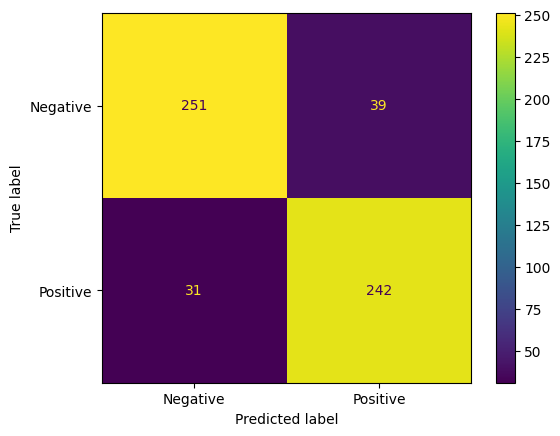

In [ ]:
cm_lg_1 = confusion_matrix(y_test_le, y_pred_lg)
cm_display_lg = ConfusionMatrixDisplay(cm_lg_1, display_labels=le.classes_).plot()

**“Важные” для каждого класса слова по коэффициентам (CountVectorizer)**

In [ ]:
feature_names = count.get_feature_names_out()

In [ ]:
feature_names

array(['__', '___', 'xa0', ..., 'ящик', 'ящичек', 'іі'], dtype=object)

In [ ]:
feature_names.shape

(26904,)

In [ ]:
log_clf.coef_.shape

(1, 26904)

In [ ]:
features_df_binary = pd.DataFrame()
features_df_binary['term'] = feature_names
features_df_binary['coef'] = log_clf.coef_[0]

coefficients_binary = features_df_binary.sort_values(by='coef', ascending=False).reset_index(drop=True)

In [ ]:
coefficients_binary[:25]

,term,coef
0,приятно,0.871642
1,потрясать,0.834166
2,минус,0.689759
3,отзыв,0.662611
4,сравнивать,0.645840
5,отлично,0.631638
6,великолепный,0.618196
7,удовольствие,0.587890
8,отличный,0.584182
9,последний,0.563343


In [ ]:
coefficients_binary[26880:26905]

,term,coef
26880,совершенно,-0.493492
26881,эффект,-0.494331
26882,мотив,-0.503406
26883,вместо,-0.515169
26884,досматривать,-0.524872
26885,идея,-0.528158
26886,реалистичный,-0.531540
26887,сожаление,-0.537853
26888,слабый,-0.538342
26889,спасать,-0.555015


Балансировка весов

In [ ]:
clf_ovr = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr', class_weight='balanced')

In [ ]:
clf_ovr.fit(X_train_vec, y_train_le)

LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   random_state=42)

In [ ]:
y_test_pred_lg_ovr = clf_ovr.predict(X_test_vec)

In [ ]:
print(classification_report(y_test_le, y_test_pred_lg_ovr, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.89      0.86      0.88       290
    Positive       0.86      0.89      0.87       273

    accuracy                           0.87       563
   macro avg       0.87      0.87      0.87       563
weighted avg       0.87      0.87      0.87       563



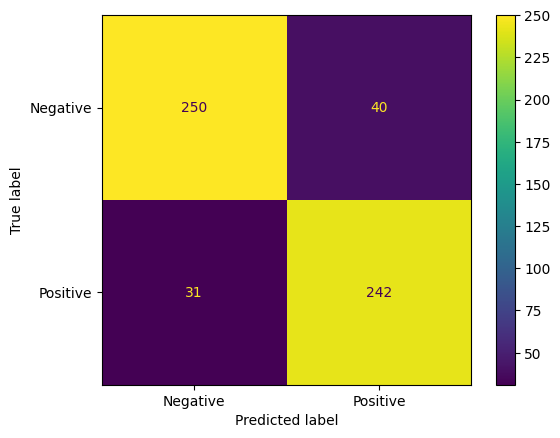

In [ ]:
cm_lg_ovr = confusion_matrix(y_test_le, y_test_pred_lg_ovr)
cm_display_lg_ovr = ConfusionMatrixDisplay(cm_lg_ovr, display_labels=le.classes_).plot()

### **TF-IDF**

In [ ]:
log_clf_tf = LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
log_clf_tf.fit(X_train_tf_idf, y_train_le)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred_lg_tf = log_clf_tf.predict(X_test_tf_idf)

In [ ]:
print(classification_report(y_test_le, y_pred_lg_tf , target_names = le.classes_))

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89       290
    Positive       0.88      0.88      0.88       273

    accuracy                           0.88       563
   macro avg       0.88      0.88      0.88       563
weighted avg       0.88      0.88      0.88       563



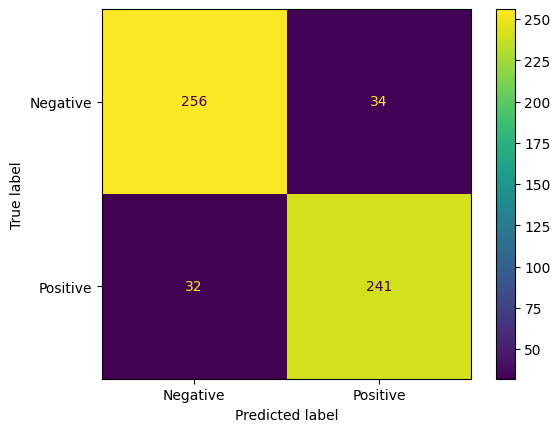

In [ ]:
cm_lg_tf = confusion_matrix(y_test_le, y_pred_lg_tf)
cm_display_lg_tf = ConfusionMatrixDisplay(cm_lg_tf, display_labels=le.classes_).plot()

**“Важные” для каждого класса слова по коэффициентам**

In [ ]:
feature_names_tf = tf_idf.get_feature_names_out()

In [ ]:
feature_names_tf

array(['__', '___', 'xa0', ..., 'ящик', 'ящичек', 'іі'], dtype=object)

In [ ]:
feature_names_tf.shape

(26904,)

In [ ]:
log_clf_tf.coef_.shape

(1, 26904)

In [ ]:
features_df_binary_tf = pd.DataFrame()
features_df_binary_tf['term'] = feature_names_tf
features_df_binary_tf['coef'] = log_clf_tf.coef_[0]

coefficients_binary_tf = features_df_binary_tf.sort_values(by='coef', ascending=False).reset_index(drop=True)

In [ ]:
coefficients_binary_tf[:25]

,term,coef
0,очень,2.144995
1,понравиться,2.140916
2,минус,1.634140
3,отзыв,1.511782
4,отлично,1.474793
5,идеальный,1.391752
6,приятно,1.389575
7,настоящий,1.383597
8,взгляд,1.320440
9,отличный,1.312458


In [ ]:
coefficients_binary_tf[26880:26905]

,term,coef
26880,абсолютно,-1.196976
26881,итог,-1.202165
26882,непонятно,-1.235128
26883,персонаж,-1.246066
26884,совершенно,-1.257290
26885,видимо,-1.267300
26886,сценарий,-1.282700
26887,скучно,-1.293683
26888,диалог,-1.311187
26889,плохой,-1.352529


### **Применение обученной модели на рандомных отзывах с сайта Кинопоиск**

**CountVectorizer**

In [ ]:
pipe_lg_vec = Pipeline([('count', CountVectorizer()),
                 ('log_clf', LogisticRegression(max_iter=1000))])

In [ ]:
pipe_lg_vec.fit(X, y)

Pipeline(steps=[('count', CountVectorizer()),
                ('log_clf', LogisticRegression(max_iter=1000))])

In [ ]:
# Фильм "Список Шиндлера" (отзыв положительный)
film_5 = '''
Великий фильм. Он не просто фильм, а шедевр мирового кинематографа. А именно так, подобно роману 'Война и мир' и другим величайшим произведениям, которые останутся монументами человечества.

Пройдут века и возможно людей не будет, но эти памятники будут жить не смотря ни на что...

Оскар Шиндлер - простой и умный предприниматель и ему нужны только деньги, но когда он видит весь ужас гитлеровщины и свирепые массовые казни над евреями, его внутренний мир меняется - душа его понимает, что он виноват, душа ему говорит, что нужно помочь людям. Вот вопрос. Как жесток человек?!

Все - таки духовно-нравственных людей мало на Земле и они достойны быть избранными.

Посмотрите вокруг, сколько гадости везде и, зло творится. И только духовно-нравственные люди могут хоть как-то повлиять на изменения баланса добра и зла. Оскар - это человек великой человеческой натуры, о которых писали гуманисты веками. Фильм = показ нам всем землянам, что добро есть и оно будет.
'''

In [ ]:
film_clean_5 = preprocess_ML(film_5) # применим препроцессинг
film_clean_5

'великий фильм не фильм шедевр мировой кинематограф подобно роман война мир великий произведение оставаться монумент человечество проходить век возможно не памятник жить не смотря ни простой умный предприниматель нужный деньги видеть ужас гитлеровщина свирепый массовый казнь еврей внутренний мир меняться душа понимать виноватый душа говорить помогать вопрос жестокий таки духовно нравственный достойный избранный посмотреть гадость зло твориться духовно нравственный повлиять изменение баланс добро зло великий человеческий натура писать гуманист век фильм показ землянин добро'

In [ ]:
pipe_lg_vec.predict(['''
великий фильм не фильм шедевр мировой кинематограф подобно роман война мир великий произведение оставаться монумент человечество проходить век возможно не памятник жить не смотря ни простой умный предприниматель нужный деньги видеть ужас гитлеровщина свирепый массовый казнь еврей внутренний мир меняться душа понимать виноватый душа говорить помогать вопрос жестокий таки духовно нравственный достойный избранный посмотреть гадость зло твориться духовно нравственный повлиять изменение баланс добро зло великий человеческий натура писать гуманист век фильм показ землянин добро'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Запах женщины" (отзыв отрицательный)
film_6 = '''

Основой сюжета стало изображение взаимоотношений пожилого незрячего полковника и очень молодого студента колледжа. Студент является ребёнком из небогатой семьи и решается подработать по сути поводырём к незрячему военному. И тут начинаются малоприятные события. Стоит сказать, что сам полковник является довольно сварливым и пошлым субъектом, которому уже стало попросту скучно жить свою жизнь. Также и у студента возникли проблемы с обучением, а именно риск потерять своё место в колледже не бюджете. А всё из-за того, что парень стал невольным свидетелем хулиганства своих якобы друзей.

Но это всё зачин. Основной хронометраж будет посвящён именно полковнику и тому, как он подвергает опасности жизнь других людей. Это грустно смотреть на фоне другого фильма, который показывает тяжесть существования простых солдат. То есть в сравнении с той же 'Первой кровью' жизни военных разных званий разительно отличаются. Если офицеры буквально сорят деньгами на сомнительные цели, то солдаты буквально ночуют на улице без возможности даже поесть в обычном кафе и найти самую обычную работу. Стоит ещё сказать, что в своей инвалидности по сути сам полковник и виноват. Тут уж можно ощутить лишь сплошное недоумение. Весь фильм был отсмотрен с этим недоумением. Финал так вообще поверг в шок, что из-за нежелания сотрудничать с директором. Студент мог вообще потерять своё место. Это просто ни в какие ворота. Притом видно, что студент способный и не зря получил свою стипендию. А тут возникает риск потери места по надуманной причине.

Речь полковника в финале так же не заставила его уважать. Всё обыденно и прозаично. А ведь ожидания были высокие, что речь заставит хулиганов самих признаться в содеянном и выглядеть большими мужчинами. Но этого не произошло. Были так же ожидания, что полковник окажется хотя бы умудрённым жизнью романтиком, который знает цену слабому полу. Но и это ожидание рухнуло под натиском прозаичной реальности. Престарелый ветеран оказался обычным пошляком.

По итогу, фильм оказался переоценённым затянутым полотном про жизнь одним днём без каких-либо мыслей о безопасности ближнего.
'''

In [ ]:
film_clean_6 = preprocess_ML(film_6) # применим препроцессинг
film_clean_6

'основа сюжет становиться изображение взаимоотношение пожилой незрячий полковник очень молодой студент колледж студент являться ребенок небогатый семья решаться подрабатывать поводырь незрячий военный начинаться малоприятный событие стоять полковник являться сварливый пошлый субъект становиться попросту скучно жить студент возникать проблема обучение риск потерять место колледж не бюджет парень становиться невольный свидетель хулиганство якобы друг зачин основной хронометраж посвящать полковник подвергать опасность грустно смотреть фильм показывать тяжесть существование простой солдат сравнение кровь военный разный звание разительный отличаться офицер буквально сорить деньги сомнительный цель солдат буквально ночевать улица без возможность поесть обычный кафе находить самый обычный работа стоить инвалидность полковник виноватый ощущать сплошной недоумение фильм отсмотреть недоумение финал вообще повергать шок нежелание сотрудничать директор студент вообще потерять место ни ворота прито

In [ ]:
pipe_lg_vec.predict(['''
основа сюжет становиться изображение взаимоотношение пожилой незрячий полковник очень молодой студент колледж студент являться ребенок небогатый семья решаться подрабатывать поводырь незрячий военный начинаться малоприятный событие стоять полковник являться сварливый пошлый субъект становиться попросту скучно жить студент возникать проблема обучение риск потерять место колледж не бюджет парень становиться невольный свидетель хулиганство якобы друг зачин основной хронометраж посвящать полковник подвергать опасность грустно смотреть фильм показывать тяжесть существование простой солдат сравнение кровь военный разный звание разительный отличаться офицер буквально сорить деньги сомнительный цель солдат буквально ночевать улица без возможность поесть обычный кафе находить самый обычный работа стоить инвалидность полковник виноватый ощущать сплошной недоумение фильм отсмотреть недоумение финал вообще повергать шок нежелание сотрудничать директор студент вообще потерять место ни ворота притом видный студент способный не зря получать стипендия возникать риск потеря место надуманный причина речь полковник финал не заставлять уважать обыденно прозаичный ожидание высокий речь заставлять хулиган признаваться содеять выглядеть большой мужчина не происходить ожидание полковник оказываться умудрять романтик знать цена слабый пол ожидание рухнуть натиск прозаичный реальность престарелый ветеран оказываться обычный пошляк итог фильм оказываться переоценивать затянутый полотно без либо мысль безопасность ближний
'''])

array(['Negative'], dtype='<U8')

**TF-IDF**

In [ ]:
pipe_lg_tf = Pipeline([('tf_idf', TfidfVectorizer()),
                 ('log_clf_tf ', LogisticRegression(max_iter=1000))])

In [ ]:
pipe_lg_tf.fit(X, y)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('log_clf_tf ', LogisticRegression(max_iter=1000))])

In [ ]:
# Фильм "Список Шиндлера" (отзыв положительный)
pipe_lg_tf.predict(['''
великий фильм не фильм шедевр мировой кинематограф подобно роман война мир великий произведение оставаться монумент человечество проходить век возможно не памятник жить не смотря ни простой умный предприниматель нужный деньги видеть ужас гитлеровщина свирепый массовый казнь еврей внутренний мир меняться душа понимать виноватый душа говорить помогать вопрос жестокий таки духовно нравственный достойный избранный посмотреть гадость зло твориться духовно нравственный повлиять изменение баланс добро зло великий человеческий натура писать гуманист век фильм показ землянин добро
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Запах женщины" (отзыв отрицательный)
pipe_lg_tf.predict(['''
основа сюжет становиться изображение взаимоотношение пожилой незрячий полковник очень молодой студент колледж студент являться ребенок небогатый семья решаться подрабатывать поводырь незрячий военный начинаться малоприятный событие стоять полковник являться сварливый пошлый субъект становиться попросту скучно жить студент возникать проблема обучение риск потерять место колледж не бюджет парень становиться невольный свидетель хулиганство якобы друг зачин основной хронометраж посвящать полковник подвергать опасность грустно смотреть фильм показывать тяжесть существование простой солдат сравнение кровь военный разный звание разительный отличаться офицер буквально сорить деньги сомнительный цель солдат буквально ночевать улица без возможность поесть обычный кафе находить самый обычный работа стоить инвалидность полковник виноватый ощущать сплошной недоумение фильм отсмотреть недоумение финал вообще повергать шок нежелание сотрудничать директор студент вообще потерять место ни ворота притом видный студент способный не зря получать стипендия возникать риск потеря место надуманный причина речь полковник финал не заставлять уважать обыденно прозаичный ожидание высокий речь заставлять хулиган признаваться содеять выглядеть большой мужчина не происходить ожидание полковник оказываться умудрять романтик знать цена слабый пол ожидание рухнуть натиск прозаичный реальность престарелый ветеран оказываться обычный пошляк итог фильм оказываться переоценивать затянутый полотно без либо мысль безопасность ближний
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Проверю, как модель оценит отзыв (положительный) на сериал "Уэнсдэй", который модель MultinomialNB с TF-IDF отнесла к отрицательным.
pipe_lg_tf.predict(['''
случай результат превосходить ожидание сразу стоить уточнять ждать совсем немногое трейлер не внушать особый доверие обещать сериал дух приключение сабрина приятно ошибаться выход получать незатейливый место интересный история очаровательный главный героиня уэнсдей полно косяк недочет минус находиться плюс деревянный скучный совершенно неубедительный зет роль мортиша великолепный ортег крайне милый несмотря специфический внешность гусман вещь дядя фестер пятиминутный подростковый любовный треугольник потерпеть гораздо интересно следить эволюция взаимоотношение уэнсдей эниды протяжение серия очень трогательный финал последний й серия главный минус сериал становиться отсутствие интрига личина злодей угадывать серия жирный очевидный подсказка прилично смазывать впечатление последний серия просмотр равный оставаться приятный послевкусие память застревать красивый план замысловатый декорация интересный костюм приятный ухо саундтрек аудио визуальный разумеется не особый значение без грамотно прописывать главный героиня центр повествование протяжение серия наблюдать взаимоотношение уэнсдей семья новый знакомый персонаж проходить длинный путь замкнутый эгоистичный социфоб способный самопожертвование дружба превращение верить здорово пусть часть персонаж не раскрывать толком не рассказывать школьный группировка урок школа блин фехтование растениеводство пара сюжетный ветка вообще забросить полпути видимо откладывать сезон час проваливаться атмосфера подростковый фэнтези испытывать эмоция схожий прочтение орден феникс летний возраст стоять
'''])

array(['Positive'], dtype='<U8')

**Интересный случай**

In [ ]:
# Фильм "Список Шиндлера" (отзыв отрицательный)
film_int_case = '''
В целом трагедия, переданная режиссёром в том фильме, понятна и ясна, однако не благодаря этому фильму.

Очень хотелось бы сопереживать хоть кому-то из персонажей, однако главным героем в данной картине выступает промышленник Шиндлер, которого воспринимаешь как простого прагматика, который хоть и является человеком 'великодушным', но тем не менее исходящем из необходимости построить производство используя крайне дешёвую и даже рабскую рабочую силу еврейского населения Кракова. Ицхак Штерн, в данном фильме сыграл, без лишних слов, выше всяких похвал. Но это пожалуй относится именно к актёрской игре, а не к наполнению картины.

Стоит обратить внимание на цветовую палитру фильма, который хоть и выдержан в откровенно черно-белых тонах, но тем не менее ряд персонажей всё же подсвечен яркими красками. С другой стороны не совсем понятно чем это обусловлено. Почему эти персонажи выделены, ведь кроме главного героя и его управляющего, сопереживать здесь просто некому. По крайней мере я для себя такого персонажа так и не нашёл.

Да, происходящее ужасно, но есть фильмы где это передано куда лучше. Допустим 'Жизнь прекрасна'. Этот художественный фильм, решает вопрос передачи 'духа времени' в художественном плане куда лучше. Со 'Списком Шиндлера' всё становится ясно уже после часа просмотра, когда ты понимаешь, что ты смотреть его уже устал, но тебе придётся наблюдать это действо ещё два часа.

Или же фильм 'Бункер', где ты наблюдаешь действие в течении всей ленты и даже не задумываешься о хронометраже, ведь каждую минуту что-то происходит.

В качестве вывода скажу следующее. Не каждый фильм из 'Топ 250', судя по всему заслуживает просмотра. Не каждый фильм, который получил кучу 'Оскаров', достоин вашего времени.

Не хватает всего, сюжета, динамики сопереживания. Да и я не помню случаев, когда нацисты строили свои поместья рядом с концлагерями. Это очень странное решение, учитывая факты описанные Уильямом Ширером, который указывает на тот факт, что сами нацисты стремились привлекать коллаборантов или же наиболее отмороженных нацистов к ликвидации еврейского, цыганского и советского народов. Ещё одно странное решение - держать собак в намордниках, когда проводят еврейский конвой. Наоборот - стоило бы дать возможность собакам сделать своё дело, ведь так было бы достовернее.

Что же касается прочих особенностей - актёры действительно играют хорошо. Нацисты действительно внушают страх, евреи в фильме этот страх поглощают и всем им веришь.

Картинка очень классная. Операторская работа и звук, как и всё звуковое оформление, на очень высоком уровне. Концовка очень трогательная, но то, как показали одного советского солдата, спускает всё повествование в унитаз. Сам фильм очень сильно проседает по мере всего повествования. По этой причине я даю такое резюме: это просто очередное кино о войне, в котором авторы не забыли в одной сцене(!) нагадить на голову Советскому Союзу.

Я бы не стал его советовать к просмотру.
'''

In [ ]:
film_int_case_clean = preprocess_ML(film_int_case) # применим препроцессинг
film_int_case_clean

'целое трагедия передавать режиссер фильм понятный ясный не благодаря фильм очень хотеться сопереживать персонаж главный герой данный картина выступать промышленник воспринимать простой прагматик являться великодушный не менее исходить необходимость построить производство использовать крайне дешевый рабский рабочий сила еврейский население краков ицхак штерн данный фильм сыграть без лишний слово высоко всякий похвала пожалуй относиться актерский игра не наполнение картина стоить обращать внимание цветовой палитра фильм выдерживать откровенно черно белый тон не менее ряд персонаж подсвечивать яркий краска сторона не совсем понятно обусловливать персонаж выделять главный герой управлять сопереживать некого крайний мера персонаж не находить происходить ужасный фильм передавать допускать прекрасный художественный фильм решать вопрос передача дух художественный план список становиться ясно час просмотр понимать смотреть уставать приходиться наблюдать действо час фильм бункер наблюдать дейст

In [ ]:
# Предсказание Logistic Regression с CountVectorizer
pipe_lg_vec.predict(['''
целое трагедия передавать режиссер фильм понятный ясный не благодаря фильм очень хотеться сопереживать персонаж главный герой данный картина выступать промышленник воспринимать простой прагматик являться великодушный не менее исходить необходимость построить производство использовать крайне дешевый рабский рабочий сила еврейский население краков ицхак штерн данный фильм сыграть без лишний слово высоко всякий похвала пожалуй относиться актерский игра не наполнение картина стоить обращать внимание цветовой палитра фильм выдерживать откровенно черно белый тон не менее ряд персонаж подсвечивать яркий краска сторона не совсем понятно обусловливать персонаж выделять главный герой управлять сопереживать некого крайний мера персонаж не находить происходить ужасный фильм передавать допускать прекрасный художественный фильм решать вопрос передача дух художественный план список становиться ясно час просмотр понимать смотреть уставать приходиться наблюдать действо час фильм бункер наблюдать действие течение лента не задумываться хронометраж минута происходить качество вывод следующий не фильм топ судя заслуживать просмотр не фильм получать куча достойный не хватать сюжет динамика сопереживание не помнить случай нацист строить поместье концлагерь очень странный решение учитывать факт описывать уильям ширер указывать факт нацист стремиться привлекать коллаборант наиболее отмораживать нацист ликвидация еврейский цыганский советский народ странный решение держать собака намордник проводить еврейский конвой наоборот стоить давать возможность собака сделать дело достоверно касаться прочий особенность актер играть нацист внушать страх еврей фильм страх поглощать верить картинка очень классный операторский работа звук звуковой оформление очень высокий уровень концовка очень трогательный показывать советский солдат спускать повествование унитаз фильм очень сильно проседать мера повествование причина давать резюме очередной кино война автор не забывать сцена нагадить голова советский не становиться советовать просмотр
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Предсказание MultinomialNB с CountVectorizer
pipe.predict(['''
целое трагедия передавать режиссер фильм понятный ясный не благодаря фильм очень хотеться сопереживать персонаж главный герой данный картина выступать промышленник воспринимать простой прагматик являться великодушный не менее исходить необходимость построить производство использовать крайне дешевый рабский рабочий сила еврейский население краков ицхак штерн данный фильм сыграть без лишний слово высоко всякий похвала пожалуй относиться актерский игра не наполнение картина стоить обращать внимание цветовой палитра фильм выдерживать откровенно черно белый тон не менее ряд персонаж подсвечивать яркий краска сторона не совсем понятно обусловливать персонаж выделять главный герой управлять сопереживать некого крайний мера персонаж не находить происходить ужасный фильм передавать допускать прекрасный художественный фильм решать вопрос передача дух художественный план список становиться ясно час просмотр понимать смотреть уставать приходиться наблюдать действо час фильм бункер наблюдать действие течение лента не задумываться хронометраж минута происходить качество вывод следующий не фильм топ судя заслуживать просмотр не фильм получать куча достойный не хватать сюжет динамика сопереживание не помнить случай нацист строить поместье концлагерь очень странный решение учитывать факт описывать уильям ширер указывать факт нацист стремиться привлекать коллаборант наиболее отмораживать нацист ликвидация еврейский цыганский советский народ странный решение держать собака намордник проводить еврейский конвой наоборот стоить давать возможность собака сделать дело достоверно касаться прочий особенность актер играть нацист внушать страх еврей фильм страх поглощать верить картинка очень классный операторский работа звук звуковой оформление очень высокий уровень концовка очень трогательный показывать советский солдат спускать повествование унитаз фильм очень сильно проседать мера повествование причина давать резюме очередной кино война автор не забывать сцена нагадить голова советский не становиться советовать просмотр
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Предсказание Logistic Regression с TF-IDF
pipe_lg_tf.predict(['''
целое трагедия передавать режиссер фильм понятный ясный не благодаря фильм очень хотеться сопереживать персонаж главный герой данный картина выступать промышленник воспринимать простой прагматик являться великодушный не менее исходить необходимость построить производство использовать крайне дешевый рабский рабочий сила еврейский население краков ицхак штерн данный фильм сыграть без лишний слово высоко всякий похвала пожалуй относиться актерский игра не наполнение картина стоить обращать внимание цветовой палитра фильм выдерживать откровенно черно белый тон не менее ряд персонаж подсвечивать яркий краска сторона не совсем понятно обусловливать персонаж выделять главный герой управлять сопереживать некого крайний мера персонаж не находить происходить ужасный фильм передавать допускать прекрасный художественный фильм решать вопрос передача дух художественный план список становиться ясно час просмотр понимать смотреть уставать приходиться наблюдать действо час фильм бункер наблюдать действие течение лента не задумываться хронометраж минута происходить качество вывод следующий не фильм топ судя заслуживать просмотр не фильм получать куча достойный не хватать сюжет динамика сопереживание не помнить случай нацист строить поместье концлагерь очень странный решение учитывать факт описывать уильям ширер указывать факт нацист стремиться привлекать коллаборант наиболее отмораживать нацист ликвидация еврейский цыганский советский народ странный решение держать собака намордник проводить еврейский конвой наоборот стоить давать возможность собака сделать дело достоверно касаться прочий особенность актер играть нацист внушать страх еврей фильм страх поглощать верить картинка очень классный операторский работа звук звуковой оформление очень высокий уровень концовка очень трогательный показывать советский солдат спускать повествование унитаз фильм очень сильно проседать мера повествование причина давать резюме очередной кино война автор не забывать сцена нагадить голова советский не становиться советовать просмотр
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Предсказание MultinomialNB с TF-IDF
pipe_tf.predict(['''
целое трагедия передавать режиссер фильм понятный ясный не благодаря фильм очень хотеться сопереживать персонаж главный герой данный картина выступать промышленник воспринимать простой прагматик являться великодушный не менее исходить необходимость построить производство использовать крайне дешевый рабский рабочий сила еврейский население краков ицхак штерн данный фильм сыграть без лишний слово высоко всякий похвала пожалуй относиться актерский игра не наполнение картина стоить обращать внимание цветовой палитра фильм выдерживать откровенно черно белый тон не менее ряд персонаж подсвечивать яркий краска сторона не совсем понятно обусловливать персонаж выделять главный герой управлять сопереживать некого крайний мера персонаж не находить происходить ужасный фильм передавать допускать прекрасный художественный фильм решать вопрос передача дух художественный план список становиться ясно час просмотр понимать смотреть уставать приходиться наблюдать действо час фильм бункер наблюдать действие течение лента не задумываться хронометраж минута происходить качество вывод следующий не фильм топ судя заслуживать просмотр не фильм получать куча достойный не хватать сюжет динамика сопереживание не помнить случай нацист строить поместье концлагерь очень странный решение учитывать факт описывать уильям ширер указывать факт нацист стремиться привлекать коллаборант наиболее отмораживать нацист ликвидация еврейский цыганский советский народ странный решение держать собака намордник проводить еврейский конвой наоборот стоить давать возможность собака сделать дело достоверно касаться прочий особенность актер играть нацист внушать страх еврей фильм страх поглощать верить картинка очень классный операторский работа звук звуковой оформление очень высокий уровень концовка очень трогательный показывать советский солдат спускать повествование унитаз фильм очень сильно проседать мера повествование причина давать резюме очередной кино война автор не забывать сцена нагадить голова советский не становиться советовать просмотр
'''])

array(['Positive'], dtype='<U8')

Обе модели Logistic Regression и MultinomialNB с обоими типами векторайзера оценили отрицательный отзыв как положительный.

**Вывод:**


1.   Результаты метрик оценки качества модели (логистическая регрессия) с разными векторайзерами высокие, практически одинаковые.
2.   Балансировка весов (векторайзер CountVectorizer) никак не сказалась на улучшении показателей метрик.

1.   Логистическая регрессия с векторайзером TF-IDF верно оценила отзыв (положительный) на сериал "Уэнсдэй", который модель MultinomialNB с TF-IDF отнесла к отрицательным.
2.   Обе модели Logistic Regression и MultinomialNB с обоими типами векторайзера оценили один и тот же отрицательный отзыв как положительный.





# ***Обучение на данных без препроцессинга***

In [ ]:
X0 = df['Text']
y0 = df['Class'].tolist()

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0,
                                                        y0,
                                                        stratify= y0,
                                                        shuffle=True,
                                                        test_size=0.2,
                                                        random_state=42) # разделим выборку на тестовое и тренировочное множество

## ***Векторизация***

**CountVectorizer**

In [ ]:
count0 = CountVectorizer()

In [ ]:
count0.fit(X_train0)

CountVectorizer()

In [ ]:
X_train_vec0 = count0.transform(X_train0)
X_test_vec0 =  count0.transform(X_test0)

**TF-IDF**

In [ ]:
tf_idf0 = TfidfVectorizer()

In [ ]:
tf_idf0.fit(X_train0)

TfidfVectorizer()

In [ ]:
X_train_tf0 = tf_idf0.transform(X_train0)
X_test_tf0 =  tf_idf0.transform(X_test0)

## ***LabelEncoder***

In [ ]:
le0 = LabelEncoder()

In [ ]:
le0.fit(y_train0)

LabelEncoder()

In [ ]:
le0.classes_

array(['Negative', 'Positive'], dtype='<U8')

In [ ]:
y_train_le0 = le0.transform(y_train0)
y_test_le0 = le0.transform(y_test0)

## ***Классификация***

## *MultinomialNB*

### **CountVectorizer**

In [ ]:
mnb0 = MultinomialNB()

In [ ]:
mnb0.fit(X_train_vec0, y_train_le0)

MultinomialNB()

In [ ]:
y_test_pred_mnb0 = mnb0.predict(X_test_vec0)

In [ ]:
print(classification_report(y_test_le0, y_test_pred_mnb0, target_names=le0.classes_))

              precision    recall  f1-score   support

    Negative       0.84      0.85      0.84       290
    Positive       0.84      0.82      0.83       273

    accuracy                           0.84       563
   macro avg       0.84      0.84      0.84       563
weighted avg       0.84      0.84      0.84       563



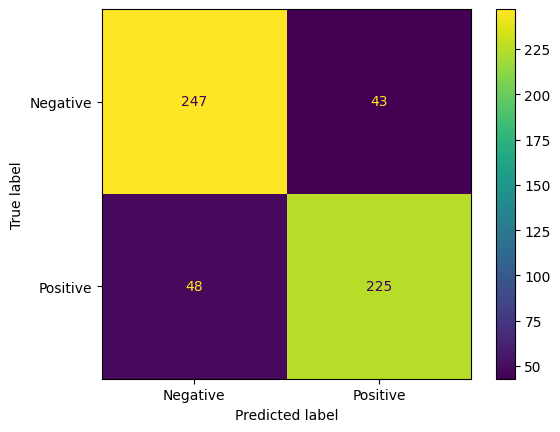

In [ ]:
cm_vec0 = confusion_matrix(y_test_le0, y_test_pred_mnb0)
cm_display_vec0 = ConfusionMatrixDisplay(cm_vec0, display_labels=le0.classes_).plot()

### **TF-IDF**

In [ ]:
mnb_tf0 = MultinomialNB()

In [ ]:
mnb_tf0.fit(X_train_tf0, y_train_le0)

MultinomialNB()

In [ ]:
y_test_pred_mnb_tf0 = mnb0.predict(X_test_tf0)

In [ ]:
print(classification_report(y_test_le0, y_test_pred_mnb_tf0, target_names=le0.classes_))

              precision    recall  f1-score   support

    Negative       0.84      0.82      0.83       290
    Positive       0.81      0.83      0.82       273

    accuracy                           0.82       563
   macro avg       0.82      0.82      0.82       563
weighted avg       0.82      0.82      0.82       563



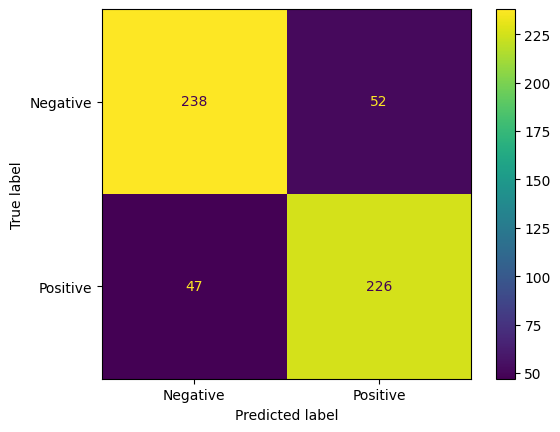

In [ ]:
cm_tf0 = confusion_matrix(y_test_le0, y_test_pred_mnb_tf0)
cm_display_tf0 = ConfusionMatrixDisplay(cm_tf0, display_labels=le0.classes_).plot()

### **Применение обученной модели на рандомных отзывах с сайта Кинопоиск**

**CountVectorizer**

In [ ]:
pipe_vec = Pipeline([('count0', CountVectorizer()),
                 ('mnb0', MultinomialNB())])

In [ ]:
pipe_vec.fit(X0, y0)

Pipeline(steps=[('count0', CountVectorizer()), ('mnb0', MultinomialNB())])

In [ ]:
# Фильм "Миссис Даутфайр" (отзыв положительный)
pipe_vec.predict(['''
Семейная 'немолодежная' комедия для субботнего вечера, с отлично проработанной сюжетной линией. Юмор в этой ленте несколько не типичен для Голливуда, но это не является недостатком, а даже наоборот.

Основной недостаток - это некоторая затянутость сюжета, особенно в первой половине фильма.'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Сериал "Оленёнок" (отзыв отрицательный)
pipe_vec.predict(['''
Сталкинг дело крайне неприятное, и с определенной его формой, наверняка, сталкивались почти все.

Первая серия казалась действительно увлекательной пусть и странной. Но потом система Станиславского дала сбой. И единственная мысль, которая у меня осталась в конце сериала была 'не верю' ведь люди так не общаются и не ведут.

Герой типичный фрустрированный неудачник, который игнорирует все лучшее, что имеет, постоянно ища проблемы на свою задницу. Он ужасно шутит, совершенно не умеет общаться, ничего не понимает в отношениях, постоянно врет, и еще делает кучу всего отвратительного. Он не делает ничего для своего развития и роста. Зато одержим разными навязчивыми идеями, от стендапа до своей сталкерши.

Вся арка персонажа сводится к тому, что в финале он растрачивает все к чему шел на протяжении аж 7 серий. Понял ли где он был не прав? изменился ли он? Нет, но хотя бы разок сказал правду и пересказал весь сюжет в предпоследней серии.

Донни не раскрыт ни с одной сторон кроме темной(но то что он точно псих сомнений нет), не раскрыта и сталкерша, подруги героя, вообще никто, ну и вишенкой на торте вывод на базе 1 фразы.

В сухом остатке не очень понятно сколько в сериале тех самых 'реальных событий', но по ощущениям крайне мало. Цель сериала - самопиар и пожалейка по средствам очень сильно накрученной истории, фальшь тут лезет из всех щелей. Прямо таки Лжец Лжец из параллельной вселенной. Одна только концепция, что герой живет у мамы своей бывшей усложняет веру в происходящее.

Из плюсов: мрачная и угнетающая атмосфера, хорошая актерская игра, приятная картинка.

Из минусов: долго, пусто, не раскрытые герои, плохие диалоги, постоянный крупный план, растянутое повествование, много всего запрещенного и противоприродного. Вместо всего сериала можно просто посмотреть 6 серию.
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Фильм "Молодость (2015)" (отзыв отрицательный)
pipe_vec.predict(['''
Удивляюсь, отчего столько положительных отзывов? Это меня в итоге и вынудило посмотреть.

Главное достоинство фильма по мнению многих - это красивая природа Швейцарии и работа оператора, который умеет преподнести любой кадр. На деле - это даже не набор красивых клипов. Швейцария и вся ее природа умещается в рекламном трейлере. Нет никакой особой природы в фильме, увы. Пару коров, деревенский луг крупным планом, вид на горы и все. Такое ощущение, что снимали только то, что было вокруг отеля.

Также и с сюжетом - его нет. Что вижу, то пою. И это даже не поэзия прозы жизни и никакая не философия. Да, потуги на философию есть. Но связного сюжета нет. Все герои и их истории - это кусочки мозаики, которые в конце не будут целым.

Фильм, если это можно назвать фильмом - это вырванные наблюдения скучающего старика. Не интересные, сразу скажу. И мысли у старика тоже скучные.

Но главный минус - это стремление все опошлить, сделать фарсом. Страстно поющую певицу, пусть и не красавицу, надо показать после ее восхитительного выступления, как отвратительную бабу, жрущую, да простите за выражение, зажаренную курицу в белых перчатках. Спа отель в фильме - это сборище омерзительных мумий, которые говорят, как они писают и развратничают. Нет, это не реализм, а цинизм и бред.
'''])

array(['Negative'], dtype='<U8')

**TF-IDF**

In [ ]:
pipe_tf0 = Pipeline([('tf_idf0', TfidfVectorizer()),
                 ('mnb_tf0', MultinomialNB())])

In [ ]:
pipe_tf0.fit(X0, y0)

Pipeline(steps=[('tf_idf0', TfidfVectorizer()), ('mnb_tf0', MultinomialNB())])

In [ ]:
# Фильм "Миссис Даутфайр" (отзыв положительный)
pipe_tf0.predict(['''
Семейная 'немолодежная' комедия для субботнего вечера, с отлично проработанной сюжетной линией. Юмор в этой ленте несколько не типичен для Голливуда, но это не является недостатком, а даже наоборот.

Основной недостаток - это некоторая затянутость сюжета, особенно в первой половине фильма.'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Сериал "Оленёнок" (отзыв отрицательный)
pipe_tf0.predict(['''
Сталкинг дело крайне неприятное, и с определенной его формой, наверняка, сталкивались почти все.

Первая серия казалась действительно увлекательной пусть и странной. Но потом система Станиславского дала сбой. И единственная мысль, которая у меня осталась в конце сериала была 'не верю' ведь люди так не общаются и не ведут.

Герой типичный фрустрированный неудачник, который игнорирует все лучшее, что имеет, постоянно ища проблемы на свою задницу. Он ужасно шутит, совершенно не умеет общаться, ничего не понимает в отношениях, постоянно врет, и еще делает кучу всего отвратительного. Он не делает ничего для своего развития и роста. Зато одержим разными навязчивыми идеями, от стендапа до своей сталкерши.

Вся арка персонажа сводится к тому, что в финале он растрачивает все к чему шел на протяжении аж 7 серий. Понял ли где он был не прав? изменился ли он? Нет, но хотя бы разок сказал правду и пересказал весь сюжет в предпоследней серии.

Донни не раскрыт ни с одной сторон кроме темной(но то что он точно псих сомнений нет), не раскрыта и сталкерша, подруги героя, вообще никто, ну и вишенкой на торте вывод на базе 1 фразы.

В сухом остатке не очень понятно сколько в сериале тех самых 'реальных событий', но по ощущениям крайне мало. Цель сериала - самопиар и пожалейка по средствам очень сильно накрученной истории, фальшь тут лезет из всех щелей. Прямо таки Лжец Лжец из параллельной вселенной. Одна только концепция, что герой живет у мамы своей бывшей усложняет веру в происходящее.

Из плюсов: мрачная и угнетающая атмосфера, хорошая актерская игра, приятная картинка.

Из минусов: долго, пусто, не раскрытые герои, плохие диалоги, постоянный крупный план, растянутое повествование, много всего запрещенного и противоприродного. Вместо всего сериала можно просто посмотреть 6 серию.
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Фильм "Молодость (2015)" (отзыв отрицательный)
pipe_tf0.predict(['''
Удивляюсь, отчего столько положительных отзывов? Это меня в итоге и вынудило посмотреть.

Главное достоинство фильма по мнению многих - это красивая природа Швейцарии и работа оператора, который умеет преподнести любой кадр. На деле - это даже не набор красивых клипов. Швейцария и вся ее природа умещается в рекламном трейлере. Нет никакой особой природы в фильме, увы. Пару коров, деревенский луг крупным планом, вид на горы и все. Такое ощущение, что снимали только то, что было вокруг отеля.

Также и с сюжетом - его нет. Что вижу, то пою. И это даже не поэзия прозы жизни и никакая не философия. Да, потуги на философию есть. Но связного сюжета нет. Все герои и их истории - это кусочки мозаики, которые в конце не будут целым.

Фильм, если это можно назвать фильмом - это вырванные наблюдения скучающего старика. Не интересные, сразу скажу. И мысли у старика тоже скучные.

Но главный минус - это стремление все опошлить, сделать фарсом. Страстно поющую певицу, пусть и не красавицу, надо показать после ее восхитительного выступления, как отвратительную бабу, жрущую, да простите за выражение, зажаренную курицу в белых перчатках. Спа отель в фильме - это сборище омерзительных мумий, которые говорят, как они писают и развратничают. Нет, это не реализм, а цинизм и бред.'''])

array(['Negative'], dtype='<U8')

## **Логистическая регрессия**

### **CountVectorizer**

In [ ]:
log_clf0 = LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
log_clf0.fit(X_train_vec0, y_train_le0)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred_lg0 = log_clf0.predict(X_test_vec0)

In [ ]:
print(classification_report(y_test_le0, y_pred_lg0, target_names = le0.classes_))

              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85       290
    Positive       0.84      0.84      0.84       273

    accuracy                           0.84       563
   macro avg       0.84      0.84      0.84       563
weighted avg       0.84      0.84      0.84       563



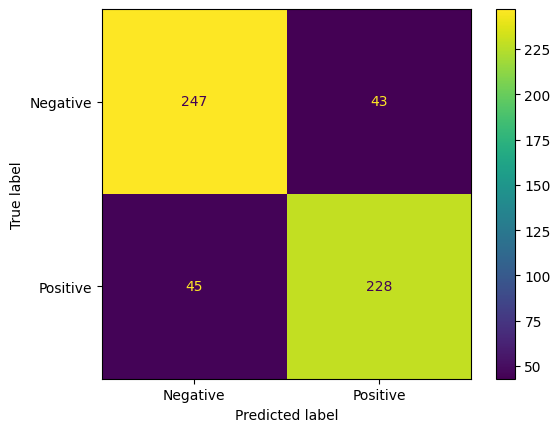

In [ ]:
cm_lg_vec0 = confusion_matrix(y_test_le0, y_pred_lg0)
cm_display_lg = ConfusionMatrixDisplay(cm_lg_vec0, display_labels=le0.classes_).plot()

### **TF-IDF**

In [ ]:
log_clf_tf0 = LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
log_clf_tf0.fit(X_train_tf0, y_train_le0)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred_lg_tf0 = log_clf_tf0.predict(X_test_tf0)

In [ ]:
print(classification_report(y_test_le0, y_pred_lg_tf0 , target_names = le0.classes_))

              precision    recall  f1-score   support

    Negative       0.87      0.88      0.87       290
    Positive       0.87      0.86      0.87       273

    accuracy                           0.87       563
   macro avg       0.87      0.87      0.87       563
weighted avg       0.87      0.87      0.87       563



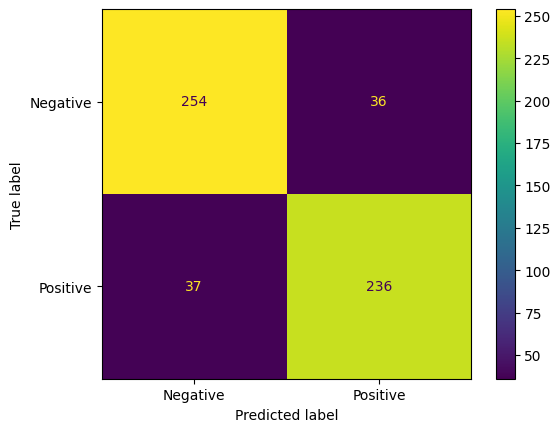

In [ ]:
cm_lg_tf0 = confusion_matrix(y_test_le0, y_pred_lg_tf0)
cm_display_lg_tf0 = ConfusionMatrixDisplay(cm_lg_tf0, display_labels=le0.classes_).plot()

### **Применение обученной модели на рандомных отзывах с сайта Кинопоиск**

**CountVectorizer**

In [ ]:
pipe_lg_vec0 = Pipeline([('count0', CountVectorizer()),
                 ('log_clf0', LogisticRegression(max_iter=1000))])

In [ ]:
pipe_lg_vec0.fit(X0, y0)

Pipeline(steps=[('count0', CountVectorizer()),
                ('log_clf0', LogisticRegression(max_iter=1000))])

In [ ]:
# Фильм "Ночной дозор" (отзыв положительный)
pipe_lg_vec0.predict(['''

Классический, как может показаться сначала, конфликт добра со злом содержит в себе несколько драматургических сюрпризов, которые раскрываются перед нами по мере повествования.

Тут и проблематика смены эпохи после распада Советского союза, когда 'старое' пытается удержаться под давлением 'нового' и отстоять свою парадигму.

Тут же и тема инициации ребёнка, который в свои 12 лет встаёт перед выбором 'лагеря' для дальнейшего взросления.

Если копнуть поглубже, то окажется, что все герои изначально - пешки на доске Завулона, который заранее уже всё просчитал, хотя по ходу сюжета он может показаться достаточно пассивным персонажем, который будто бы нехотя периодически вмешивается в события фильма. Отчасти мы видим это в эпизодах его игры в Мортал комбат.

Конечно если говорить о жанре, то здесь как раз-таки возникнет 'коктейль' из драмы, боевика, ужасов и возможно чего-то ещё. Но если учесть новизну такого кино для России начала 2000-х, то это можно записать скорее в плюсы. Бекмамбетов попробовал использовать всё и даёт возможность 'вкусить' это и зрителю.

Всё это приправлено клиповым монтажом, который стал для зрителей 2004 года новинкой и придал фильму ту самую 'блокбастерность', которую так хотели тем же зрителям и продать.
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Сериал "Одни из нас" (отзыв отрицательный)
pipe_lg_vec0.predict(['''
Как истинный фанат игры The Last of Us я решила посмотреть этот сериал и на 3 серии просто БЫЛА ПОРАЖЕНА.

Могу сказать, что вся атмосфера и серии в принципе сделаны по каждой части игры. Как идет игра по сюжету так она и развивается в сериале. Графика замечательно сделана, как в игре, все щелкуны и зомби попадание 'в точку'. Звуки тоже совпадают.

Я могу смириться с тем, что актеры не похожи на персонажей из игры. Как Сара, которая в игре белокурая, фарфоровая нежная девочка, то в сериале она более грубее выглядит и она афроамериканка (не в обиду афроамериканцам, я их уважаю, к актрисе нет никаких претензий). Джоэл и Томми отлично подобранные актеры, мимика, манера поведения, все 'в точку'.

Билл... Билл стал геем в 3 серии. Для меня это удар и поражение в сердце острым ножом... ЗАЧЕМ? Билл для меня в игре был настоящим кумиром и гением, который придумал ловушки, обустроил свое убежище и хорошо адаптировался в условиях апокалипсиса.

Что я вижу в сериале. Билл такой же гений, только более мягкий и покладистее. Билл стал подстилкой, который занимается любовью с мужчиной...

Я надеюсь, что когда-нибудь мы сможем увидеть реально отличный сериал по мотивам этой легендарной игры.

Дальше 3 серии я смотреть не стану, для меня это шок.'''])

array(['Negative'], dtype='<U8')

**Ошибочные предсказания**

In [ ]:
# Фильм "Дьявол носит Prada" (отзыв отрицательный)
pipe_lg_vec0.predict(['''

Еще в детстве, когда я смотрела этот фильм, мне очень понравилась картинка, очень понравились главные героини. Но мне не понравился посыл: стань такой, какой хочет твой мужик и токсичные друзья. Я тогда ещё не знала слово «токсичный», но я остро ощутила, что так жить нельзя. Что с горных вершин она падает в болото, в котором она не сможет быть собой. Миранда реально тянула героиню вверх. А старые друзья были как крабы в банке, которые хотели лишь одного — чтобы она оставалась такой, какой была раньше.

Миранда заставила измениться героиню внешне. Но внутренне девушка осталось той же яркой, целеустремлённой натурой, которой была. Более того, она ещё сильнее открыла в себе эти качества. Миранда не лезла к ней в душу, не заставляла изменить свой характер. Она хотела только одного — качественного выполнения работы. И девушка, выполняя ее, значительно выросла личностно, стала организованной и хваткой, а не безответственной и расхлябанной, как раньше, что замечает и её начальница. Обратно же героиня падает потому, что сценаристы хотели показать: главное — отношение. Как человека, бывший в токсичном окружении много лет, могу сказать: не любые отношения стоят того.

У героини были все шансы построить новые отношения с людьми, подобными ей. Но она испугалась одиночества, разочарования, в которое на время впала Миранда. Ей кажется, что слова, сказанные в горькую минуту, и есть её настоящая жизнь. Она испугалась, что ее ждет такая же жалкая жизнь. На самом деле жизнь Миранды далеко не жалкая. Она в полной мере реализует свой талант. Она может позволить себе быть искренней даже с помощницей и не бояться осуждения. Да, она не пускает незнакомых людей в душу, но в этом и суть! Энди сама точно охарактеризовала ее: «Будь Миранда мужчиной, все бы только и говорили о том, что она мастер своего дела». А ещё у Миранды двое любимых и любящих её дочерей.

Энди не дала себе времени понять, что мир бизнеса не для розовых соплей и сантиментов. Она не дала себе времени узнать новых людей, которые ее окружают, понять, что ими движет. Она поспешила их осудить по меркам домашних посиделок и милых междусобойчиков. Как овечка, привыкнув жить в овечьем стаде, начинает считать прайд львов каким-то жестоким и кровожадным. И будет права по меркам овечьего стада. Но не по меркам хищников. А еще Энди не понимает одну простую вещь: она сама не овечка. Она хищница. И она успешно демонстрирует это на протяжении всего фильма. Вернувшись в овечье стадо, она обращает свою собственную силу против себя. И ей ещё предстоит это узнать.

И конечно, Миранда никакой не дьявол. Она обычный человек, который любит свою семью, хочет самореализации, тщательно выбирает свой ближний круг и помогает своей бывшей помощнице найти новую работу. Как мать, которая прощает непутевого ребенка. И если это дьяволизм, то нам всем не мешало бы поучиться такому дьяволизму.

Мораль ужасна и перечеркивает всё, но фильм как произведение искусства
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Человек швейцарский нож" (отзыв отрицательный)
pipe_lg_vec0.predict(['''
Поверьте, я терпимо отношусь к секс-меньшинствам. И признаю вклад их представителей в сферы различных искусств. Прочтя несколько рецензий к этому фильму, сели с семьей (я, жена (нам около 40), и дочь 12 лет) провести вечер с интересным фильмом. Дочь так вообще обожает Гарри Поттера, и ждала Рэдклиффа увидеть в непривычной для него роли. Но...

Господа, у фильма во второй его половине мы с женой явно разглядели его месседж. Главный герой не ищет себя, как тут кто-то в рецензиях написал. ГГ просто скрывает свою ориентацию; под надуманными предлогами отказывается от общения с девушками, своим отцом, прячется от людей, и оттягивает момент возвращения из своего 'побега'. Моральные переживания и излияния-монологи я не буду подробно передавать - это поток слов, оправдывающих его 'некаквсейность'. Но создатели фильма таки нашли способ отнестись к (себе?) геям с юмором: множество приколов основано на анатомических особенностях практикующих нетрадиционный секс мужчин (я про задний проход). Это и создает у неискушенных зрителей ложное ощущение комедийности фильма. Получается, фильмец с двойным дном: разбавив сюжет моральными переживаниями ГГ, нам пропагандируют отношения мужчина-мужчина во всех его многогранностях. Человек-швейцарский нож - это гей на необитаемом острове.

Дочка, слава Богу, не все поняла, и просто посмеялась над некоторыми моментами.
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Однажды в Америке" (отзыв отрицательный)
pipe_lg_vec0.predict(['''
Начинать критику нужно с фундамента, поэтому вначале прогуляемся по книге 'банды', именно эта макулатура послужила для экранизации, автор этого сборника сказок Гарри Грэй - диванный мафиози. Вся книга это склейка наворованных сюжетов из гангстерского кино 30-ых, которые автор выдает за свою прожитую жизнь, в частности плагиат из фильмов с участием Джеймса Кэгни, например Ангелы с грязными лицами (1938), этот фильм как-то пародировали в Один дома (1990), тот самый которым Кевин Маккалистер спугнул грабителя и доставщика пиццы, а так-же: Враг общества (1931), Ревущие двадцатые, или Судьба солдата в Америке (1939) и Белая горячка (1949).

Мамкин хулиган по имени Гарри Грэй любит ни только Джеймса Кэгни, так-же он предпочитает режиссера Уильяма Уайлера и его фильм Тупик (1937), там и знакомства с Максом и тема с часами и многое другие, автор книги все это так-же выдал за свою историю жизни. Книга The Hoods, вышла в 1952, но все фильмы откуда украли сюжет, вышли в эпоху 30-ых годов, в самый расцвет гангстерского кино. Реальная история такова, Гарри Грэй опасными вечерами сидел в безопасном кинотеатре и смотрел гангстерское кино, затем приходил домой к любимой мамочки и шел в свою комнату - чтобы сесть за печатную машинку и напечатать все те сцены что ему понравились на большом экране кинотеатре, разумеется выдавая все это за свой жизненный путь.

Цветокоррекция у Однажды в Америке, такая-же как и в Крестном отце, стиль подачи, операторская работа и даже режиссура, все мастерство Серджо Леоне одолжил у Фрэнсис Форд Коппола. Получается мамкин гангстер Гарри Грэй одолжил сюжет у Голливуда 30-ых годов, а Леоне все остальное у Копполы, соответственно у Однажды в Америке нету ничего своего, кроме Эннио Морриконе, величайшего маэстро.

Актерский состав, из всех гангстерских фильмов, именно в этом фильме актеры играют ни совсем так хорошо, как в остальных гангстерских фильмах.

Хронометраж слишком долгий, хотя я как раз любитель тех фильмов что длятся больше трех часов, но именно эта кинолента заслуживает лишь старых, добрых сто минут.
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Посмотрим, как справится MultinomialNB + CountVectorizer

In [ ]:
# Фильм "Дьявол носит Prada" (отзыв отрицательный)
pipe_vec.predict(['''

Еще в детстве, когда я смотрела этот фильм, мне очень понравилась картинка, очень понравились главные героини. Но мне не понравился посыл: стань такой, какой хочет твой мужик и токсичные друзья. Я тогда ещё не знала слово «токсичный», но я остро ощутила, что так жить нельзя. Что с горных вершин она падает в болото, в котором она не сможет быть собой. Миранда реально тянула героиню вверх. А старые друзья были как крабы в банке, которые хотели лишь одного — чтобы она оставалась такой, какой была раньше.

Миранда заставила измениться героиню внешне. Но внутренне девушка осталось той же яркой, целеустремлённой натурой, которой была. Более того, она ещё сильнее открыла в себе эти качества. Миранда не лезла к ней в душу, не заставляла изменить свой характер. Она хотела только одного — качественного выполнения работы. И девушка, выполняя ее, значительно выросла личностно, стала организованной и хваткой, а не безответственной и расхлябанной, как раньше, что замечает и её начальница. Обратно же героиня падает потому, что сценаристы хотели показать: главное — отношение. Как человека, бывший в токсичном окружении много лет, могу сказать: не любые отношения стоят того.

У героини были все шансы построить новые отношения с людьми, подобными ей. Но она испугалась одиночества, разочарования, в которое на время впала Миранда. Ей кажется, что слова, сказанные в горькую минуту, и есть её настоящая жизнь. Она испугалась, что ее ждет такая же жалкая жизнь. На самом деле жизнь Миранды далеко не жалкая. Она в полной мере реализует свой талант. Она может позволить себе быть искренней даже с помощницей и не бояться осуждения. Да, она не пускает незнакомых людей в душу, но в этом и суть! Энди сама точно охарактеризовала ее: «Будь Миранда мужчиной, все бы только и говорили о том, что она мастер своего дела». А ещё у Миранды двое любимых и любящих её дочерей.

Энди не дала себе времени понять, что мир бизнеса не для розовых соплей и сантиментов. Она не дала себе времени узнать новых людей, которые ее окружают, понять, что ими движет. Она поспешила их осудить по меркам домашних посиделок и милых междусобойчиков. Как овечка, привыкнув жить в овечьем стаде, начинает считать прайд львов каким-то жестоким и кровожадным. И будет права по меркам овечьего стада. Но не по меркам хищников. А еще Энди не понимает одну простую вещь: она сама не овечка. Она хищница. И она успешно демонстрирует это на протяжении всего фильма. Вернувшись в овечье стадо, она обращает свою собственную силу против себя. И ей ещё предстоит это узнать.

И конечно, Миранда никакой не дьявол. Она обычный человек, который любит свою семью, хочет самореализации, тщательно выбирает свой ближний круг и помогает своей бывшей помощнице найти новую работу. Как мать, которая прощает непутевого ребенка. И если это дьяволизм, то нам всем не мешало бы поучиться такому дьяволизму.

Мораль ужасна и перечеркивает всё, но фильм как произведение искусства
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Человек швейцарский нож" (отзыв отрицательный)
pipe_vec.predict(['''
Поверьте, я терпимо отношусь к секс-меньшинствам. И признаю вклад их представителей в сферы различных искусств. Прочтя несколько рецензий к этому фильму, сели с семьей (я, жена (нам около 40), и дочь 12 лет) провести вечер с интересным фильмом. Дочь так вообще обожает Гарри Поттера, и ждала Рэдклиффа увидеть в непривычной для него роли. Но...

Господа, у фильма во второй его половине мы с женой явно разглядели его месседж. Главный герой не ищет себя, как тут кто-то в рецензиях написал. ГГ просто скрывает свою ориентацию; под надуманными предлогами отказывается от общения с девушками, своим отцом, прячется от людей, и оттягивает момент возвращения из своего 'побега'. Моральные переживания и излияния-монологи я не буду подробно передавать - это поток слов, оправдывающих его 'некаквсейность'. Но создатели фильма таки нашли способ отнестись к (себе?) геям с юмором: множество приколов основано на анатомических особенностях практикующих нетрадиционный секс мужчин (я про задний проход). Это и создает у неискушенных зрителей ложное ощущение комедийности фильма. Получается, фильмец с двойным дном: разбавив сюжет моральными переживаниями ГГ, нам пропагандируют отношения мужчина-мужчина во всех его многогранностях. Человек-швейцарский нож - это гей на необитаемом острове.

Дочка, слава Богу, не все поняла, и просто посмеялась над некоторыми моментами.
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Фильм "Однажды в Америке" (отзыв отрицательный)
pipe_vec.predict(['''
Начинать критику нужно с фундамента, поэтому вначале прогуляемся по книге 'банды', именно эта макулатура послужила для экранизации, автор этого сборника сказок Гарри Грэй - диванный мафиози. Вся книга это склейка наворованных сюжетов из гангстерского кино 30-ых, которые автор выдает за свою прожитую жизнь, в частности плагиат из фильмов с участием Джеймса Кэгни, например Ангелы с грязными лицами (1938), этот фильм как-то пародировали в Один дома (1990), тот самый которым Кевин Маккалистер спугнул грабителя и доставщика пиццы, а так-же: Враг общества (1931), Ревущие двадцатые, или Судьба солдата в Америке (1939) и Белая горячка (1949).

Мамкин хулиган по имени Гарри Грэй любит ни только Джеймса Кэгни, так-же он предпочитает режиссера Уильяма Уайлера и его фильм Тупик (1937), там и знакомства с Максом и тема с часами и многое другие, автор книги все это так-же выдал за свою историю жизни. Книга The Hoods, вышла в 1952, но все фильмы откуда украли сюжет, вышли в эпоху 30-ых годов, в самый расцвет гангстерского кино. Реальная история такова, Гарри Грэй опасными вечерами сидел в безопасном кинотеатре и смотрел гангстерское кино, затем приходил домой к любимой мамочки и шел в свою комнату - чтобы сесть за печатную машинку и напечатать все те сцены что ему понравились на большом экране кинотеатре, разумеется выдавая все это за свой жизненный путь.

Цветокоррекция у Однажды в Америке, такая-же как и в Крестном отце, стиль подачи, операторская работа и даже режиссура, все мастерство Серджо Леоне одолжил у Фрэнсис Форд Коппола. Получается мамкин гангстер Гарри Грэй одолжил сюжет у Голливуда 30-ых годов, а Леоне все остальное у Копполы, соответственно у Однажды в Америке нету ничего своего, кроме Эннио Морриконе, величайшего маэстро.

Актерский состав, из всех гангстерских фильмов, именно в этом фильме актеры играют ни совсем так хорошо, как в остальных гангстерских фильмах.

Хронометраж слишком долгий, хотя я как раз любитель тех фильмов что длятся больше трех часов, но именно эта кинолента заслуживает лишь старых, добрых сто минут.
'''])

array(['Positive'], dtype='<U8')

**TF-IDF**

In [ ]:
pipe_lg_tf0 = Pipeline([('tf_idf0', TfidfVectorizer()),
                 ('log_clf_tf0', LogisticRegression(max_iter=1000))])

In [ ]:
pipe_lg_tf0.fit(X0, y0)

Pipeline(steps=[('tf_idf0', TfidfVectorizer()),
                ('log_clf_tf0', LogisticRegression(max_iter=1000))])

In [ ]:
# Фильм "Ночной дозор" (отзыв положительный)
pipe_lg_tf0.predict(['''

Классический, как может показаться сначала, конфликт добра со злом содержит в себе несколько драматургических сюрпризов, которые раскрываются перед нами по мере повествования.

Тут и проблематика смены эпохи после распада Советского союза, когда 'старое' пытается удержаться под давлением 'нового' и отстоять свою парадигму.

Тут же и тема инициации ребёнка, который в свои 12 лет встаёт перед выбором 'лагеря' для дальнейшего взросления.

Если копнуть поглубже, то окажется, что все герои изначально - пешки на доске Завулона, который заранее уже всё просчитал, хотя по ходу сюжета он может показаться достаточно пассивным персонажем, который будто бы нехотя периодически вмешивается в события фильма. Отчасти мы видим это в эпизодах его игры в Мортал комбат.

Конечно если говорить о жанре, то здесь как раз-таки возникнет 'коктейль' из драмы, боевика, ужасов и возможно чего-то ещё. Но если учесть новизну такого кино для России начала 2000-х, то это можно записать скорее в плюсы. Бекмамбетов попробовал использовать всё и даёт возможность 'вкусить' это и зрителю.

Всё это приправлено клиповым монтажом, который стал для зрителей 2004 года новинкой и придал фильму ту самую 'блокбастерность', которую так хотели тем же зрителям и продать.
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Сериал "Одни из нас" (отзыв отрицательный)
pipe_lg_tf0.predict(['''
Как истинный фанат игры The Last of Us я решила посмотреть этот сериал и на 3 серии просто БЫЛА ПОРАЖЕНА.

Могу сказать, что вся атмосфера и серии в принципе сделаны по каждой части игры. Как идет игра по сюжету так она и развивается в сериале. Графика замечательно сделана, как в игре, все щелкуны и зомби попадание 'в точку'. Звуки тоже совпадают.

Я могу смириться с тем, что актеры не похожи на персонажей из игры. Как Сара, которая в игре белокурая, фарфоровая нежная девочка, то в сериале она более грубее выглядит и она афроамериканка (не в обиду афроамериканцам, я их уважаю, к актрисе нет никаких претензий). Джоэл и Томми отлично подобранные актеры, мимика, манера поведения, все 'в точку'.

Билл... Билл стал геем в 3 серии. Для меня это удар и поражение в сердце острым ножом... ЗАЧЕМ? Билл для меня в игре был настоящим кумиром и гением, который придумал ловушки, обустроил свое убежище и хорошо адаптировался в условиях апокалипсиса.

Что я вижу в сериале. Билл такой же гений, только более мягкий и покладистее. Билл стал подстилкой, который занимается любовью с мужчиной...

Я надеюсь, что когда-нибудь мы сможем увидеть реально отличный сериал по мотивам этой легендарной игры.

Дальше 3 серии я смотреть не стану, для меня это шок.'''])

array(['Negative'], dtype='<U8')

**Ошибочные предсказания**

In [ ]:
# Фильм "Дьявол носит Prada" (отзыв отрицательный)
pipe_lg_tf0.predict(['''

Еще в детстве, когда я смотрела этот фильм, мне очень понравилась картинка, очень понравились главные героини. Но мне не понравился посыл: стань такой, какой хочет твой мужик и токсичные друзья. Я тогда ещё не знала слово «токсичный», но я остро ощутила, что так жить нельзя. Что с горных вершин она падает в болото, в котором она не сможет быть собой. Миранда реально тянула героиню вверх. А старые друзья были как крабы в банке, которые хотели лишь одного — чтобы она оставалась такой, какой была раньше.

Миранда заставила измениться героиню внешне. Но внутренне девушка осталось той же яркой, целеустремлённой натурой, которой была. Более того, она ещё сильнее открыла в себе эти качества. Миранда не лезла к ней в душу, не заставляла изменить свой характер. Она хотела только одного — качественного выполнения работы. И девушка, выполняя ее, значительно выросла личностно, стала организованной и хваткой, а не безответственной и расхлябанной, как раньше, что замечает и её начальница. Обратно же героиня падает потому, что сценаристы хотели показать: главное — отношение. Как человека, бывший в токсичном окружении много лет, могу сказать: не любые отношения стоят того.

У героини были все шансы построить новые отношения с людьми, подобными ей. Но она испугалась одиночества, разочарования, в которое на время впала Миранда. Ей кажется, что слова, сказанные в горькую минуту, и есть её настоящая жизнь. Она испугалась, что ее ждет такая же жалкая жизнь. На самом деле жизнь Миранды далеко не жалкая. Она в полной мере реализует свой талант. Она может позволить себе быть искренней даже с помощницей и не бояться осуждения. Да, она не пускает незнакомых людей в душу, но в этом и суть! Энди сама точно охарактеризовала ее: «Будь Миранда мужчиной, все бы только и говорили о том, что она мастер своего дела». А ещё у Миранды двое любимых и любящих её дочерей.

Энди не дала себе времени понять, что мир бизнеса не для розовых соплей и сантиментов. Она не дала себе времени узнать новых людей, которые ее окружают, понять, что ими движет. Она поспешила их осудить по меркам домашних посиделок и милых междусобойчиков. Как овечка, привыкнув жить в овечьем стаде, начинает считать прайд львов каким-то жестоким и кровожадным. И будет права по меркам овечьего стада. Но не по меркам хищников. А еще Энди не понимает одну простую вещь: она сама не овечка. Она хищница. И она успешно демонстрирует это на протяжении всего фильма. Вернувшись в овечье стадо, она обращает свою собственную силу против себя. И ей ещё предстоит это узнать.

И конечно, Миранда никакой не дьявол. Она обычный человек, который любит свою семью, хочет самореализации, тщательно выбирает свой ближний круг и помогает своей бывшей помощнице найти новую работу. Как мать, которая прощает непутевого ребенка. И если это дьяволизм, то нам всем не мешало бы поучиться такому дьяволизму.

Мораль ужасна и перечеркивает всё, но фильм как произведение искусства
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Человек швейцарский нож" (отзыв отрицательный)
pipe_lg_tf0.predict(['''
Поверьте, я терпимо отношусь к секс-меньшинствам. И признаю вклад их представителей в сферы различных искусств. Прочтя несколько рецензий к этому фильму, сели с семьей (я, жена (нам около 40), и дочь 12 лет) провести вечер с интересным фильмом. Дочь так вообще обожает Гарри Поттера, и ждала Рэдклиффа увидеть в непривычной для него роли. Но...

Господа, у фильма во второй его половине мы с женой явно разглядели его месседж. Главный герой не ищет себя, как тут кто-то в рецензиях написал. ГГ просто скрывает свою ориентацию; под надуманными предлогами отказывается от общения с девушками, своим отцом, прячется от людей, и оттягивает момент возвращения из своего 'побега'. Моральные переживания и излияния-монологи я не буду подробно передавать - это поток слов, оправдывающих его 'некаквсейность'. Но создатели фильма таки нашли способ отнестись к (себе?) геям с юмором: множество приколов основано на анатомических особенностях практикующих нетрадиционный секс мужчин (я про задний проход). Это и создает у неискушенных зрителей ложное ощущение комедийности фильма. Получается, фильмец с двойным дном: разбавив сюжет моральными переживаниями ГГ, нам пропагандируют отношения мужчина-мужчина во всех его многогранностях. Человек-швейцарский нож - это гей на необитаемом острове.

Дочка, слава Богу, не все поняла, и просто посмеялась над некоторыми моментами.
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Однажды в Америке" (отзыв отрицательный)
pipe_lg_tf0.predict(['''
Начинать критику нужно с фундамента, поэтому вначале прогуляемся по книге 'банды', именно эта макулатура послужила для экранизации, автор этого сборника сказок Гарри Грэй - диванный мафиози. Вся книга это склейка наворованных сюжетов из гангстерского кино 30-ых, которые автор выдает за свою прожитую жизнь, в частности плагиат из фильмов с участием Джеймса Кэгни, например Ангелы с грязными лицами (1938), этот фильм как-то пародировали в Один дома (1990), тот самый которым Кевин Маккалистер спугнул грабителя и доставщика пиццы, а так-же: Враг общества (1931), Ревущие двадцатые, или Судьба солдата в Америке (1939) и Белая горячка (1949).

Мамкин хулиган по имени Гарри Грэй любит ни только Джеймса Кэгни, так-же он предпочитает режиссера Уильяма Уайлера и его фильм Тупик (1937), там и знакомства с Максом и тема с часами и многое другие, автор книги все это так-же выдал за свою историю жизни. Книга The Hoods, вышла в 1952, но все фильмы откуда украли сюжет, вышли в эпоху 30-ых годов, в самый расцвет гангстерского кино. Реальная история такова, Гарри Грэй опасными вечерами сидел в безопасном кинотеатре и смотрел гангстерское кино, затем приходил домой к любимой мамочки и шел в свою комнату - чтобы сесть за печатную машинку и напечатать все те сцены что ему понравились на большом экране кинотеатре, разумеется выдавая все это за свой жизненный путь.

Цветокоррекция у Однажды в Америке, такая-же как и в Крестном отце, стиль подачи, операторская работа и даже режиссура, все мастерство Серджо Леоне одолжил у Фрэнсис Форд Коппола. Получается мамкин гангстер Гарри Грэй одолжил сюжет у Голливуда 30-ых годов, а Леоне все остальное у Копполы, соответственно у Однажды в Америке нету ничего своего, кроме Эннио Морриконе, величайшего маэстро.

Актерский состав, из всех гангстерских фильмов, именно в этом фильме актеры играют ни совсем так хорошо, как в остальных гангстерских фильмах.

Хронометраж слишком долгий, хотя я как раз любитель тех фильмов что длятся больше трех часов, но именно эта кинолента заслуживает лишь старых, добрых сто минут.
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Посмотрим, как справится MultinomialNB + TF-IDF

In [ ]:
pipe_tf0.predict(['''

Еще в детстве, когда я смотрела этот фильм, мне очень понравилась картинка, очень понравились главные героини. Но мне не понравился посыл: стань такой, какой хочет твой мужик и токсичные друзья. Я тогда ещё не знала слово «токсичный», но я остро ощутила, что так жить нельзя. Что с горных вершин она падает в болото, в котором она не сможет быть собой. Миранда реально тянула героиню вверх. А старые друзья были как крабы в банке, которые хотели лишь одного — чтобы она оставалась такой, какой была раньше.

Миранда заставила измениться героиню внешне. Но внутренне девушка осталось той же яркой, целеустремлённой натурой, которой была. Более того, она ещё сильнее открыла в себе эти качества. Миранда не лезла к ней в душу, не заставляла изменить свой характер. Она хотела только одного — качественного выполнения работы. И девушка, выполняя ее, значительно выросла личностно, стала организованной и хваткой, а не безответственной и расхлябанной, как раньше, что замечает и её начальница. Обратно же героиня падает потому, что сценаристы хотели показать: главное — отношение. Как человека, бывший в токсичном окружении много лет, могу сказать: не любые отношения стоят того.

У героини были все шансы построить новые отношения с людьми, подобными ей. Но она испугалась одиночества, разочарования, в которое на время впала Миранда. Ей кажется, что слова, сказанные в горькую минуту, и есть её настоящая жизнь. Она испугалась, что ее ждет такая же жалкая жизнь. На самом деле жизнь Миранды далеко не жалкая. Она в полной мере реализует свой талант. Она может позволить себе быть искренней даже с помощницей и не бояться осуждения. Да, она не пускает незнакомых людей в душу, но в этом и суть! Энди сама точно охарактеризовала ее: «Будь Миранда мужчиной, все бы только и говорили о том, что она мастер своего дела». А ещё у Миранды двое любимых и любящих её дочерей.

Энди не дала себе времени понять, что мир бизнеса не для розовых соплей и сантиментов. Она не дала себе времени узнать новых людей, которые ее окружают, понять, что ими движет. Она поспешила их осудить по меркам домашних посиделок и милых междусобойчиков. Как овечка, привыкнув жить в овечьем стаде, начинает считать прайд львов каким-то жестоким и кровожадным. И будет права по меркам овечьего стада. Но не по меркам хищников. А еще Энди не понимает одну простую вещь: она сама не овечка. Она хищница. И она успешно демонстрирует это на протяжении всего фильма. Вернувшись в овечье стадо, она обращает свою собственную силу против себя. И ей ещё предстоит это узнать.

И конечно, Миранда никакой не дьявол. Она обычный человек, который любит свою семью, хочет самореализации, тщательно выбирает свой ближний круг и помогает своей бывшей помощнице найти новую работу. Как мать, которая прощает непутевого ребенка. И если это дьяволизм, то нам всем не мешало бы поучиться такому дьяволизму.

Мораль ужасна и перечеркивает всё, но фильм как произведение искусства
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Фильм "Человек швейцарский нож" (отзыв отрицательный)
pipe_tf0.predict(['''
Поверьте, я терпимо отношусь к секс-меньшинствам. И признаю вклад их представителей в сферы различных искусств. Прочтя несколько рецензий к этому фильму, сели с семьей (я, жена (нам около 40), и дочь 12 лет) провести вечер с интересным фильмом. Дочь так вообще обожает Гарри Поттера, и ждала Рэдклиффа увидеть в непривычной для него роли. Но...

Господа, у фильма во второй его половине мы с женой явно разглядели его месседж. Главный герой не ищет себя, как тут кто-то в рецензиях написал. ГГ просто скрывает свою ориентацию; под надуманными предлогами отказывается от общения с девушками, своим отцом, прячется от людей, и оттягивает момент возвращения из своего 'побега'. Моральные переживания и излияния-монологи я не буду подробно передавать - это поток слов, оправдывающих его 'некаквсейность'. Но создатели фильма таки нашли способ отнестись к (себе?) геям с юмором: множество приколов основано на анатомических особенностях практикующих нетрадиционный секс мужчин (я про задний проход). Это и создает у неискушенных зрителей ложное ощущение комедийности фильма. Получается, фильмец с двойным дном: разбавив сюжет моральными переживаниями ГГ, нам пропагандируют отношения мужчина-мужчина во всех его многогранностях. Человек-швейцарский нож - это гей на необитаемом острове.

Дочка, слава Богу, не все поняла, и просто посмеялась над некоторыми моментами.
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Фильм "Однажды в Америке" (отзыв отрицательный)
pipe_tf0.predict(['''
Начинать критику нужно с фундамента, поэтому вначале прогуляемся по книге 'банды', именно эта макулатура послужила для экранизации, автор этого сборника сказок Гарри Грэй - диванный мафиози. Вся книга это склейка наворованных сюжетов из гангстерского кино 30-ых, которые автор выдает за свою прожитую жизнь, в частности плагиат из фильмов с участием Джеймса Кэгни, например Ангелы с грязными лицами (1938), этот фильм как-то пародировали в Один дома (1990), тот самый которым Кевин Маккалистер спугнул грабителя и доставщика пиццы, а так-же: Враг общества (1931), Ревущие двадцатые, или Судьба солдата в Америке (1939) и Белая горячка (1949).

Мамкин хулиган по имени Гарри Грэй любит ни только Джеймса Кэгни, так-же он предпочитает режиссера Уильяма Уайлера и его фильм Тупик (1937), там и знакомства с Максом и тема с часами и многое другие, автор книги все это так-же выдал за свою историю жизни. Книга The Hoods, вышла в 1952, но все фильмы откуда украли сюжет, вышли в эпоху 30-ых годов, в самый расцвет гангстерского кино. Реальная история такова, Гарри Грэй опасными вечерами сидел в безопасном кинотеатре и смотрел гангстерское кино, затем приходил домой к любимой мамочки и шел в свою комнату - чтобы сесть за печатную машинку и напечатать все те сцены что ему понравились на большом экране кинотеатре, разумеется выдавая все это за свой жизненный путь.

Цветокоррекция у Однажды в Америке, такая-же как и в Крестном отце, стиль подачи, операторская работа и даже режиссура, все мастерство Серджо Леоне одолжил у Фрэнсис Форд Коппола. Получается мамкин гангстер Гарри Грэй одолжил сюжет у Голливуда 30-ых годов, а Леоне все остальное у Копполы, соответственно у Однажды в Америке нету ничего своего, кроме Эннио Морриконе, величайшего маэстро.

Актерский состав, из всех гангстерских фильмов, именно в этом фильме актеры играют ни совсем так хорошо, как в остальных гангстерских фильмах.

Хронометраж слишком долгий, хотя я как раз любитель тех фильмов что длятся больше трех часов, но именно эта кинолента заслуживает лишь старых, добрых сто минут.
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# ПРОВЕРИТЬ GRIDSEARCH

**Вывод:**


1.   Метрики оценки качества моделей MultinomialNB и LogisticRegression, обученных на данных без препроцессинга ниже, чем у моделей обученных на предобработанных данных. Также предсказательная способность ниже.
2.   Показательный пример с тремя отрицательными отзывами:

*   Логистическая регрессия с двумя типами векторайзеров полностью ошиблась — определила отрицательные отзывы, как положительные;
*   MultinomialNB + CountVectorizer верно определил только один из трех отзывов;

*   MultinomialNB (TF-IDF) справился лучше всех, верно определив тональность всех трех отрицательных отзывов.



# **Ансамблевая модель (RandomForestClassifier)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**CountVectorizer**

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)

In [ ]:
rf_clf.fit(X_train_vec, y_train_le)

RandomForestClassifier(random_state=0)

In [ ]:
rf_clf_preds = rf_clf.predict(X_test_vec)

In [ ]:
print(classification_report(y_test_le, rf_clf_preds))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       290
           1       0.80      0.77      0.79       273

    accuracy                           0.80       563
   macro avg       0.80      0.80      0.80       563
weighted avg       0.80      0.80      0.80       563



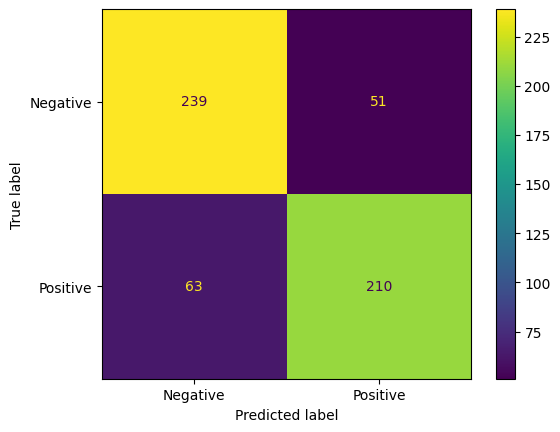

In [ ]:
cm_rf_vec = confusion_matrix(y_test_le, rf_clf_preds)
cm_display_rf_vec = ConfusionMatrixDisplay(cm_rf_vec, display_labels=le.classes_).plot()

**TF-IDF**

In [ ]:
rf_clf_tf = RandomForestClassifier(random_state=0)

In [ ]:
rf_clf_tf.fit(X_train_tf_idf, y_train_le)

RandomForestClassifier(random_state=0)

In [ ]:
rf_clf_preds_tf = rf_clf_tf.predict(X_test_tf_idf)

In [ ]:
print(classification_report(y_test_le, rf_clf_preds_tf))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       290
           1       0.83      0.76      0.79       273

    accuracy                           0.81       563
   macro avg       0.81      0.81      0.81       563
weighted avg       0.81      0.81      0.81       563



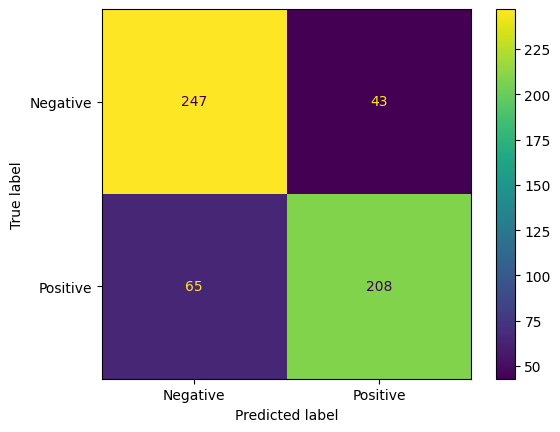

In [ ]:
cm_rf_tf = confusion_matrix(y_test_le, rf_clf_preds_tf)
cm_display_rf_tf = ConfusionMatrixDisplay(cm_rf_tf, display_labels=le.classes_).plot()

## **GridSearch в Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

**CountVectorizer**

In [ ]:
gs_params = {'max_depth': [2, 5, 10, None],
             'max_features': [0.3, 'sqrt', 1.0],
             'n_estimators': [10, 100, 500]}

In [ ]:
gs = GridSearchCV(RandomForestClassifier(), gs_params, scoring='f1_weighted', verbose=5)

In [ ]:
gs.fit(X_train_vec, y_train_le)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=2, max_features=0.3, n_estimators=10;, score=0.636 total time=   0.3s
[CV 2/5] END max_depth=2, max_features=0.3, n_estimators=10;, score=0.680 total time=   0.3s
[CV 3/5] END max_depth=2, max_features=0.3, n_estimators=10;, score=0.638 total time=   0.3s
[CV 4/5] END max_depth=2, max_features=0.3, n_estimators=10;, score=0.637 total time=   0.3s
[CV 5/5] END max_depth=2, max_features=0.3, n_estimators=10;, score=0.662 total time=   0.3s
[CV 1/5] END max_depth=2, max_features=0.3, n_estimators=100;, score=0.662 total time=   2.6s
[CV 2/5] END max_depth=2, max_features=0.3, n_estimators=100;, score=0.704 total time=   2.7s
[CV 3/5] END max_depth=2, max_features=0.3, n_estimators=100;, score=0.679 total time=   2.7s
[CV 4/5] END max_depth=2, max_features=0.3, n_estimators=100;, score=0.657 total time=   4.6s
[CV 5/5] END max_depth=2, max_features=0.3, n_estimators=100;, score=0.676 total time=   3.4s
[CV

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, None],
                         'max_features': [0.3, 'sqrt', 1.0],
                         'n_estimators': [10, 100, 500]},
             scoring='f1_weighted', verbose=5)

In [ ]:
gs.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}

In [ ]:
gs_preds = gs.predict(X_test_vec)

In [ ]:
print(classification_report(y_test_le, gs_preds))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       290
           1       0.82      0.81      0.81       273

    accuracy                           0.82       563
   macro avg       0.82      0.82      0.82       563
weighted avg       0.82      0.82      0.82       563



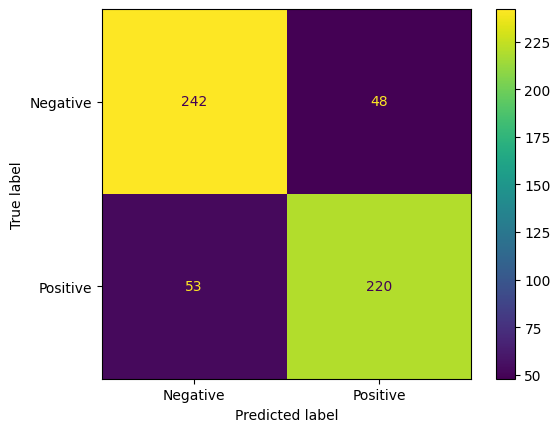

In [ ]:
cm_rf_gs = confusion_matrix(y_test_le, gs_preds)
cm_display_gs = ConfusionMatrixDisplay(cm_rf_gs, display_labels=le.classes_).plot()

## **Применение обученной модели на рандомных отзывах с сайта Кинопоиск**

In [ ]:
pipe_rf_clf = Pipeline([('count', CountVectorizer()),
                 ('rf_clf', RandomForestClassifier(max_depth = None, max_features = 'sqrt', n_estimators=500))])

In [ ]:
pipe_rf_clf.fit(X, y)

Pipeline(steps=[('count', CountVectorizer()),
                ('rf_clf', RandomForestClassifier(n_estimators=500))])

In [ ]:
# Сериал "Уэнсдэй" (отзыв положительный)
pipe_rf_clf.predict(['''
случай результат превосходить ожидание сразу стоить уточнять ждать совсем немногое трейлер не внушать особый доверие обещать сериал дух приключение сабрина приятно ошибаться выход получать незатейливый место интересный история очаровательный главный героиня уэнсдей полно косяк недочет минус находиться плюс деревянный скучный совершенно неубедительный зет роль мортиша великолепный ортег крайне милый несмотря специфический внешность гусман вещь дядя фестер пятиминутный подростковый любовный треугольник потерпеть гораздо интересно следить эволюция взаимоотношение уэнсдей эниды протяжение серия очень трогательный финал последний й серия главный минус сериал становиться отсутствие интрига личина злодей угадывать серия жирный очевидный подсказка прилично смазывать впечатление последний серия просмотр равный оставаться приятный послевкусие память застревать красивый план замысловатый декорация интересный костюм приятный ухо саундтрек аудио визуальный разумеется не особый значение без грамотно прописывать главный героиня центр повествование протяжение серия наблюдать взаимоотношение уэнсдей семья новый знакомый персонаж проходить длинный путь замкнутый эгоистичный социфоб способный самопожертвование дружба превращение верить здорово пусть часть персонаж не раскрывать толком не рассказывать школьный группировка урок школа блин фехтование растениеводство пара сюжетный ветка вообще забросить полпути видимо откладывать сезон час проваливаться атмосфера подростковый фэнтези испытывать эмоция схожий прочтение орден феникс летний возраст стоять
'''])

array(['Negative'], dtype='<U8')

In [ ]:
# Фильм "Криминальное чтиво" (отзыв положительный)
pipe_rf_clf.predict(['''
культовый фильм самый хороший режиссер современность картина расходиться цитата мема мир просмотр не пожалеть потратить очень внимательно вслушиваться диалог дабы улавливать смысл происходить экран очередь стоить отмечать очень талантливо миксовать комедия преступление делать живой беседа главный герой лично гениальность режиссер высмеивать составлять криминальный мир потешаться банальный стереотипный вид общение формальный ситуация бытовой главный герой наблюдать типовой поведение различный обстановка превращать черный юмор огромный плюс кинокартина не очередной бомбежка друг друг очень хороший гангстерский лента философия закладывать буквально фраза поэтому фильм являться хороший жанр показываться нудный длинный большой вероятность лента не похожий типичный криминальный кино подумать подниматься тема мораль верность поиск жизненный смысл криминальный чтиво безусловно картина являться сплошной режиссерский почерк особенно не знакомый творчество данный режиссер шедевр вполне подходить знакомство работа великий мастер криминальный драма кинолента использовать излюбленный прием нижний ракурс мексиканский тупик резюмировать вышесказанный приходить вывод данный картина вовсе не шаблонный фильм очень эстетизация насилие кровь очень интересный смесь юмор ирония кровавый постмодернистский боевик
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Список Шиндлера" (отзыв положительный)
pipe_rf_clf.predict(['''
великий фильм не фильм шедевр мировой кинематограф подобно роман война мир великий произведение оставаться монумент человечество проходить век возможно не памятник жить не смотря ни простой умный предприниматель нужный деньги видеть ужас гитлеровщина свирепый массовый казнь еврей внутренний мир меняться душа понимать виноватый душа говорить помогать вопрос жестокий таки духовно нравственный достойный избранный посмотреть гадость зло твориться духовно нравственный повлиять изменение баланс добро зло великий человеческий натура писать гуманист век фильм показ землянин добро
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Список Шиндлера" (отзыв отрицательный)
pipe_rf_clf.predict(['''
целое трагедия передавать режиссер фильм понятный ясный не благодаря фильм очень хотеться сопереживать персонаж главный герой данный картина выступать промышленник воспринимать простой прагматик являться великодушный не менее исходить необходимость построить производство использовать крайне дешевый рабский рабочий сила еврейский население краков ицхак штерн данный фильм сыграть без лишний слово высоко всякий похвала пожалуй относиться актерский игра не наполнение картина стоить обращать внимание цветовой палитра фильм выдерживать откровенно черно белый тон не менее ряд персонаж подсвечивать яркий краска сторона не совсем понятно обусловливать персонаж выделять главный герой управлять сопереживать некого крайний мера персонаж не находить происходить ужасный фильм передавать допускать прекрасный художественный фильм решать вопрос передача дух художественный план список становиться ясно час просмотр понимать смотреть уставать приходиться наблюдать действо час фильм бункер наблюдать действие течение лента не задумываться хронометраж минута происходить качество вывод следующий не фильм топ судя заслуживать просмотр не фильм получать куча достойный не хватать сюжет динамика сопереживание не помнить случай нацист строить поместье концлагерь очень странный решение учитывать факт описывать уильям ширер указывать факт нацист стремиться привлекать коллаборант наиболее отмораживать нацист ликвидация еврейский цыганский советский народ странный решение держать собака намордник проводить еврейский конвой наоборот стоить давать возможность собака сделать дело достоверно касаться прочий особенность актер играть нацист внушать страх еврей фильм страх поглощать верить картинка очень классный операторский работа звук звуковой оформление очень высокий уровень концовка очень трогательный показывать советский солдат спускать повествование унитаз фильм очень сильно проседать мера повествование причина давать резюме очередной кино война автор не забывать сцена нагадить голова советский не становиться советовать просмотр
'''])

array(['Positive'], dtype='<U8')

In [ ]:
# Фильм "Дьявол носит Prada" (отзыв отрицательный)
film_gs = '''
Еще в детстве, когда я смотрела этот фильм, мне очень понравилась картинка, очень понравились главные героини. Но мне не понравился посыл: стань такой, какой хочет твой мужик и токсичные друзья. Я тогда ещё не знала слово «токсичный», но я остро ощутила, что так жить нельзя. Что с горных вершин она падает в болото, в котором она не сможет быть собой. Миранда реально тянула героиню вверх. А старые друзья были как крабы в банке, которые хотели лишь одного — чтобы она оставалась такой, какой была раньше.

Миранда заставила измениться героиню внешне. Но внутренне девушка осталось той же яркой, целеустремлённой натурой, которой была. Более того, она ещё сильнее открыла в себе эти качества. Миранда не лезла к ней в душу, не заставляла изменить свой характер. Она хотела только одного — качественного выполнения работы. И девушка, выполняя ее, значительно выросла личностно, стала организованной и хваткой, а не безответственной и расхлябанной, как раньше, что замечает и её начальница. Обратно же героиня падает потому, что сценаристы хотели показать: главное — отношение. Как человека, бывший в токсичном окружении много лет, могу сказать: не любые отношения стоят того.

У героини были все шансы построить новые отношения с людьми, подобными ей. Но она испугалась одиночества, разочарования, в которое на время впала Миранда. Ей кажется, что слова, сказанные в горькую минуту, и есть её настоящая жизнь. Она испугалась, что ее ждет такая же жалкая жизнь. На самом деле жизнь Миранды далеко не жалкая. Она в полной мере реализует свой талант. Она может позволить себе быть искренней даже с помощницей и не бояться осуждения. Да, она не пускает незнакомых людей в душу, но в этом и суть! Энди сама точно охарактеризовала ее: «Будь Миранда мужчиной, все бы только и говорили о том, что она мастер своего дела». А ещё у Миранды двое любимых и любящих её дочерей.

Энди не дала себе времени понять, что мир бизнеса не для розовых соплей и сантиментов. Она не дала себе времени узнать новых людей, которые ее окружают, понять, что ими движет. Она поспешила их осудить по меркам домашних посиделок и милых междусобойчиков. Как овечка, привыкнув жить в овечьем стаде, начинает считать прайд львов каким-то жестоким и кровожадным. И будет права по меркам овечьего стада. Но не по меркам хищников. А еще Энди не понимает одну простую вещь: она сама не овечка. Она хищница. И она успешно демонстрирует это на протяжении всего фильма. Вернувшись в овечье стадо, она обращает свою собственную силу против себя. И ей ещё предстоит это узнать.

И конечно, Миранда никакой не дьявол. Она обычный человек, который любит свою семью, хочет самореализации, тщательно выбирает свой ближний круг и помогает своей бывшей помощнице найти новую работу. Как мать, которая прощает непутевого ребенка. И если это дьяволизм, то нам всем не мешало бы поучиться такому дьяволизму.

Мораль ужасна и перечеркивает всё, но фильм как произведение искусства
'''

In [ ]:
film_clean_gs = preprocess_ML(film_gs) # применим препроцессинг
film_clean_gs

'детство смотреть фильм очень понравиться картинка очень понравиться главный героиня не понравиться посыл становиться мужик токсичный друг не знать слово токсичный остро ощущать жить нельзя горный вершина падать болото не смочь миранда реально тянуть героиня старый друг краб банк оставаться миранда заставлять изменяться героиня внешне внутренне девушка оставаться яркий целеустремленный натура более сильно открывать качество миранда не лезть душа не заставлять изменять характер качественный выполнение работа девушка выполнять значительно вырастать личностный становиться организованный хватка не безответственный расхлябывать замечать начальница обратно героиня падать сценарист показывать главное отношение бывший токсичный окружение не любой отношение стоять героиня шанс построить новый отношение подобный испугаться одиночество разочарование впадать миранда казаться слово горький минута настоящий испугаться ждать жалкий самый дело миранда не жалкий полный мера реализовать талант позволять

In [ ]:
# Фильм "Дьявол носит Prada" (отзыв отрицательный)
pipe_rf_clf.predict(['''
детство смотреть фильм очень понравиться картинка очень понравиться главный героиня не понравиться посыл становиться мужик токсичный друг не знать слово токсичный остро ощущать жить нельзя горный вершина падать болото не смочь миранда реально тянуть героиня старый друг краб банк оставаться миранда заставлять изменяться героиня внешне внутренне девушка оставаться яркий целеустремленный натура более сильно открывать качество миранда не лезть душа не заставлять изменять характер качественный выполнение работа девушка выполнять значительно вырастать личностный становиться организованный хватка не безответственный расхлябывать замечать начальница обратно героиня падать сценарист показывать главное отношение бывший токсичный окружение не любой отношение стоять героиня шанс построить новый отношение подобный испугаться одиночество разочарование впадать миранда казаться слово горький минута настоящий испугаться ждать жалкий самый дело миранда не жалкий полный мера реализовать талант позволять искренний помощница не бояться осуждение не пускать незнакомый душа энди точно охарактеризовать миранда мужчина говорить мастер дело миранда двое любимый любить дочь энди не давать понимать мир бизнес не розовый сопли сантименты не давать узнавать новый окружать понимать двигать поспешить осуждать мерка домашний посиделки милый междусобойчик овечка привыкать жить овечий стадо начинать считать прайд лев жестокий кровожадный право мерка овечий стадо не мерка хищник энди не понимать простой вещь не овечка хищница успешно демонстрировать протяжение фильм вернуться овечий стадо обращать собственный сила предстоять узнавать миранда никакой не дьявол обычный любить семья самореализация тщательно выбирать ближний круг помогать бывший помощница находить новый работа мать прощать непутевый ребенок дьяволизм не мешать поучиться дьяволизм мораль ужасный перечеркивать фильм произведение искусство
'''])

array(['Positive'], dtype='<U8')